<a href="https://colab.research.google.com/github/Marion13673/TelecomX_PARTE2_LATAM/blob/main/TelecomX_PARTE2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. PREPARACIÓN DE LOS DATOS**

##**1.1. IMPORTACIÓN DE LOS DATOS**

Los datos se importan a través de la biblioteca Pandas en el archivo **datos_tratados.csv** Los datos provienen del proyecto TelecomX_Parte1_LATAM.

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [331]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [332]:
datos.head(2)

,ID del cliente,Deserción en la empresa,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593,2.19
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542,2.00


In [333]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID del cliente                         7267 non-null   object 
 1   Deserción en la empresa                7267 non-null   int64  
 2   Género del cliente                     7267 non-null   object 
 3   Cliente senior                         7267 non-null   int64  
 4   Relación de pareja                     7267 non-null   int64  
 5   Dependientes                           7267 non-null   int64  
 6   Meses de contrato                      7267 non-null   int64  
 7   Servicio telefónico                    7267 non-null   int64  
 8   Múltiples líneas telefónicas           7267 non-null   int64  
 9   INTERNET                               7267 non-null   object 
 10  Seguridad en línea (INTERNET)          7267 non-null   int64  
 11  Resp

In [334]:
datos.shape

(7267, 22)

______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#**2. TRATAMIENTOS DE LOS DATOS**




##**2.1 Eliminación de la columna irrelevante**

In [335]:
datos = datos.drop(['ID del cliente'],axis=1)


In [336]:
datos.head(2)

,Deserción en la empresa,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,Seguridad en línea (INTERNET),...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593,2.19
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542,2.00


In [337]:
datos  = datos.rename(columns={'Deserción en la empresa': 'Churn'})

##**2.2 Transformación de las variables categóricas a formato numérico**



In [338]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [339]:
X = datos.drop(['Churn'], axis = 1)
y=datos['Churn']

In [340]:
columnas = X.columns

In [341]:

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['Género del cliente','INTERNET','Tipo de contrato','Forma de pago']),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [342]:

X = one_hot.fit_transform(X)

In [343]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__Género del cliente_Mujer,onehotencoder__INTERNET_DSL,onehotencoder__INTERNET_Fiber optic,onehotencoder__INTERNET_No,onehotencoder__Tipo de contrato_Month-to-month,onehotencoder__Tipo de contrato_One year,onehotencoder__Tipo de contrato_Two year,onehotencoder__Forma de pago_Bank transfer (automatic),onehotencoder__Forma de pago_Credit card (automatic),onehotencoder__Forma de pago_Electronic check,...,remainder__Seguridad en línea (INTERNET),remainder__Respaldo en línea (INTERNET),remainder__Protección del dispositivo (INTERNET),remainder__Soporte técnico (INTERNET),remainder__Televisión por cable,remainder__Streaming de películas,remainder__Factura en línea,remainder__Monto mensual,remainder__Monto total según meses contratados,remainder__Monto diario
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.0,2.19
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.0,2.00
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.0,2.46
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.0,3.27
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.0,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.0,1.84
7263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.0,2.84
7264,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.0,1.68
7265,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.0,2.26



<div align="justify">

###**🧠 ¿Qué se logra con esto?**

- Transformar variables como **'Género del cliente'**, **'INTERNET'**, **'Tipo de contrato'**, **'Forma de pago'** en múltiples columnas binarias para que los modelos entiendan relaciones no ordinales.
- Mantener las columnas numéricas **(Meses de contrato, Monto mensual, etc.)** bajo **'passthrough'**, lo que evita perder información cuantitativa relevante.
- El resultado es un dataset limpio, homogéneo y listo para alimentar cualquier clasificador (árboles, regresiones, redes, etc.).

</div>

In [344]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [345]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas)).to_excel('/content/drive/MyDrive/pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas)).xlsx')

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

#**3. VERIFICACIÓN DE LA PROPORCIÓN DE CANCELACIÓN (CHURN)**



<div align=justify>
<font size="5">
1. Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.
</div>
</font>

In [346]:

proporcion_cancelacion = datos['Churn'].value_counts(normalize=True).map('{:.2%}'.format)
proporcion_cancelacion=proporcion_cancelacion.reset_index()
proporcion_cancelacion

,Churn,proportion
0,0,74.28%
1,1,25.72%


##**🔍 Lo que revelan esos números**

<div align='justify'>



- 74.28% de los clientes no cancelaron el servicio.
- 25.72% sí lo hicieron, lo que da un claro caso de clases desbalanceadas.
Esto significa que si se usa un modelo sin ajustar, puede aprender a predecir siempre "no cancelación" y aún así tener una precisión alta — pero una capacidad muy pobre para detectar la cancelación real. Por eso, es clave que optimizar recall o f1-score para la clase positiva (Churn = 1).

</div>


**Distribución de la variable objetivo**
<div align='justify'>
La variable Churn presenta un desequilibrio significativo: el 74.28% de los clientes no cancelaron el servicio, mientras que solo el 25.72% sí lo hicieron. Esta desproporción puede afectar el rendimiento de los modelos predictivos, que tienden a favorecer la clase mayoritaria. Por ello, se considera necesario aplicar técnicas de balanceo como SMOTE o NearMiss para mejorar la capacidad de la cancelación real.
</div>


In [347]:
proporcion_cancelacion = datos['Churn'].value_counts().map('{:,.0f}'.format)
proporcion_cancelacion=proporcion_cancelacion.reset_index()

proporcion_cancelacion

,Churn,count
0,0,"5,398"
1,1,"1,869"


**Distribución absoluta de cancelaciones**
<div align='justify'>
El conjunto de datos contiene un total de 7,267 registros, de los cuales 5,398 corresponden a clientes que no cancelaron el servicio (Churn = 0) y 1,869 a clientes que sí lo hicieron (Churn = 1). Esta diferencia de magnitud refuerza la necesidad de aplicar técnicas de balanceo para evitar que el modelo subestime la clase minoritaria.
</div>

##**3.1 Gráfico de Barra: "Distribución de Cancelación"**

---



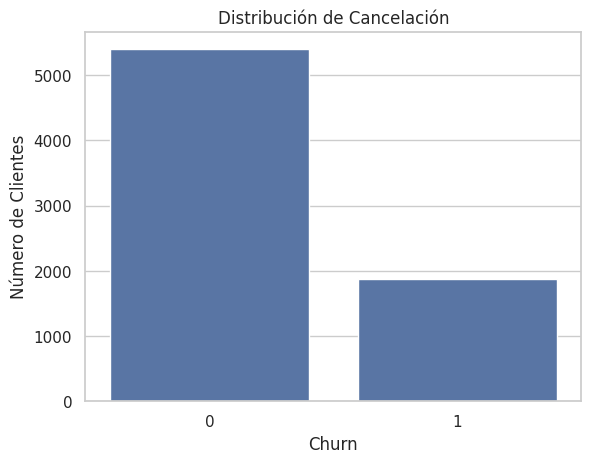

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Cancelación')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**4. CORRELACIÓN DE VARIABLES**

In [349]:
datos_modificados= datos.drop(['Género del cliente','INTERNET','Tipo de contrato','Forma de pago'],axis=1)


In [350]:
datos_modificados

,Churn,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,Seguridad en línea (INTERNET),Respaldo en línea (INTERNET),Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Factura en línea,Monto mensual,Monto total según meses contratados,Monto diario
0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.60,593,2.19
1,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.90,542,2.00
2,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73.90,280,2.46
3,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98.00,1237,3.27
4,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.90,267,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,1,0,0,1,0,0,0,55.15,742,1.84
7263,1,0,1,0,22,1,1,0,0,0,0,0,1,1,85.10,1873,2.84
7264,0,0,0,0,2,1,0,0,1,0,0,0,0,1,50.30,92,1.68
7265,0,0,1,1,67,1,0,1,0,1,1,0,1,0,67.85,4627,2.26


In [351]:
datos_modificados.corr()

,Churn,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,Seguridad en línea (INTERNET),Respaldo en línea (INTERNET),Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Factura en línea,Monto mensual,Monto total según meses contratados,Monto diario
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.186666,0.189866,-0.193346,0.189918
Cliente senior,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.104077,0.220360
Relación de pareja,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.315408,0.097180
Dependientes,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.061474,-0.115879
Meses de contrato,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.825408,0.247992
Servicio telefónico,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113984,0.246668
Múltiples líneas telefónicas,0.039343,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468405,0.490712
Seguridad en línea (INTERNET),-0.166828,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.412763,0.298303
Respaldo en línea (INTERNET),-0.080163,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512027,0.442954
Protección del dispositivo (INTERNET),-0.063452,0.060358,0.153209,0.014797,0.361792,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720,0.105211,0.483590,0.523837,0.483549


##**4.1 Gráfico de calor: "Churn"**

<Axes: >

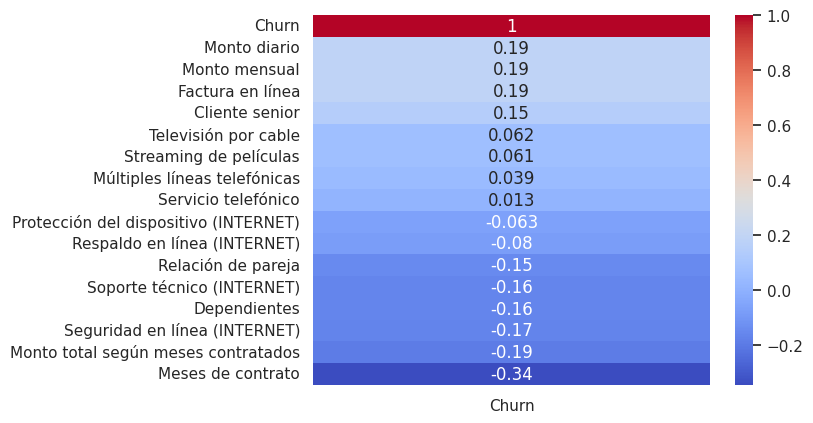

In [352]:
import seaborn as sns

# Ordenar de menor a mayor correlación con 'Churn'
corr_ordenado = datos_modificados.corr()[['Churn']].sort_values(by='Churn', ascending=True)

# Invertir el orden del índice para que las negativas queden abajo
corr_ordenado = corr_ordenado[::-1]

# Graficar el heatmap
sns.heatmap(corr_ordenado, annot=True, cmap='coolwarm')

###**🔗 Variables con correlación más fuerte (aunque ninguna es altísima)**




| Variable                          | Correlación con Churn | Interpretación                                          |
|:---------------------------------:|:---------------------:|:-------------------------------------------------------:|  
| Meses de contrato                 | -0.34                 | Más tiempo de contrato → menos probabilidad de cancelar |
| Monto total contratado            | -0.19                 | Clientes con más inversión histórica = menos cancelación|
| Seguridad                         | -0.17                 | Tener servicios adicionales podría fidelizar            |
| dependientes/Soporte (INTERNET)   | ≈ -0.16               | Tener servicios adicionales podría fidelizar            |
| Relación de pareja                | ≈ -0.15               | Indican mayor estabilidad (correlación negativa)        |
| Monto mensual                     | +0.19                 | Cuotas altas parecen asociarse con más cancelaciones    |
| Monto diario                      | +0.19                 | Similar a lo anterior, posible percepción de costo      |
| Cliente senior                    | +0.15                 | Leve tendencia a cancelar más, aunque no definitiva     |







**Visualización de correlaciones con la variable objetivo**

<div align='justify'>
El gráfico de calor permite identificar rápidamente qué variables están más asociadas con la cancelación del servicio. Las tonalidades azules indican factores que podrían actuar como protectores frente a la cancelación (como contratos largos o servicios adicionales), mientras que los tonos rojos señalan posibles factores de riesgo (como pagos mensuales elevados o edad). Esta visualización respalda la selección de variables relevantes para el modelo predictivo y refuerza la necesidad de considerar tanto aspectos contractuales como de servicio.
</div>

##**4.2 Histograma: "Cliente senior versus Churn"**

In [353]:
import plotly.express as px

In [354]:
import plotly.express as px
print('Nota: \n0= Menor de 65 años \n1= Mayor de 65 años\n')
px.histogram(datos, x='Cliente senior', text_auto=True,color='Churn',barmode='group')

Nota: 
0= Menor de 65 años 
1= Mayor de 65 años



<div align='jutify'>

**Cliente senior** muestra una correlación positiva con Churn (+0.15), pero dado que el valor 1 representa a los clientes mayores de 65 años, esta correlación indica que los clientes más jóvenes (menores de 65) son quienes cancelan con mayor frecuencia. Este hallazgo sugiere que la edad podría influir en la fidelidad del cliente, siendo los adultos mayores más propensos a mantener el servicio.
</div>

##**4.3 Histograma: "Factura en línea versus Churn"**

In [355]:
import plotly.express as px
print('\nFACTURA EN LÍNEA\n0= No\n1= Si\n')
px.histogram(datos, x='Factura en línea', text_auto=True,color='Churn',barmode='group')


FACTURA EN LÍNEA
0= No
1= Si



<div align='jutify'>

**Factura en línea** muestra una correlación positiva con Churn (+0.19), el valor 1 representa a los clientes con factura en línea, esta correlación indica que los clientes con factura en línea son más propensos en cancelar el servicio.
</div>

##**4.4 Histograma: "Monto mensual versus Churn"**

In [356]:

px.histogram(datos, x='Monto mensual', text_auto=True,color='Churn',barmode='group')



**Monto mensual**<div align='jutify'>Muestra una correlación positiva con Churn (+0.19), el valor 1 representa los montos mensuales incurridos en los servicios contratados que fueron cancelados, esta correlación indica que los clientes con montos mas altos son más propensos en cancelar el servicio.</div>


______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



#**5. GRÁFICOS DE BOX**

##**5.1 Gráfico BOX: "Meses de contrato"**

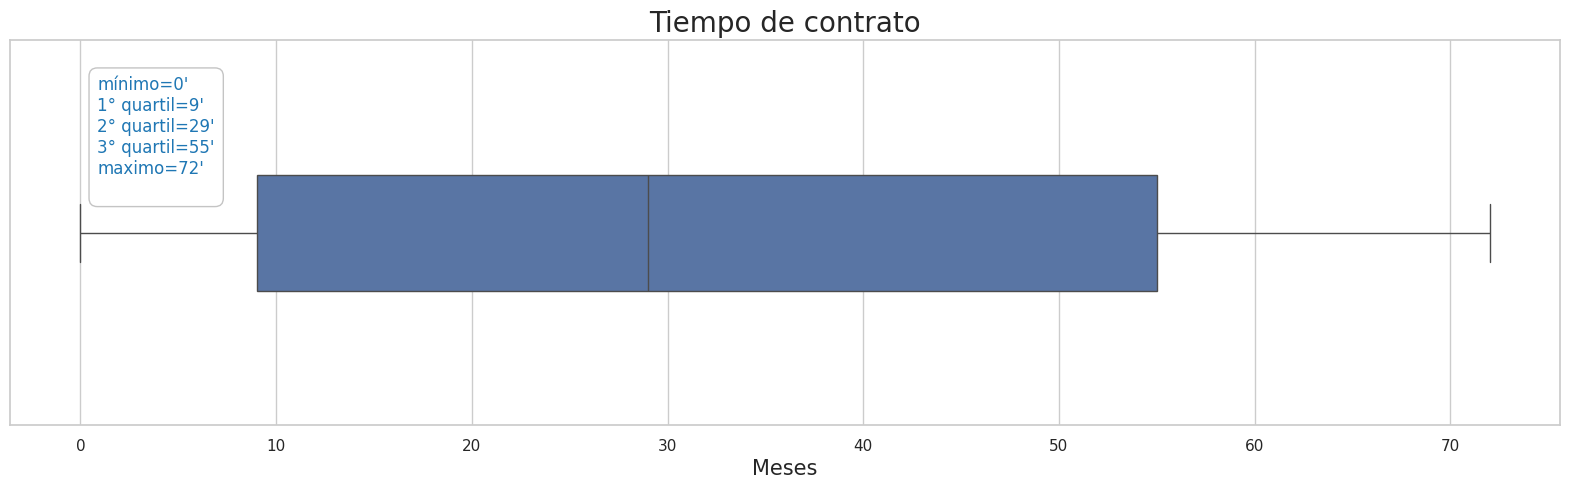

In [357]:
# Colores Zoop
GRIS_1 = '#F5F5F5'
GRIS_3 = '#C4C4C4'
GRIS_5 = '#4F4F4F'
AZUL_1 = '#1F77B4'
AQUA_1 = '#17BECF'
BLANCO = '#FFFFFF'

# Crear el boxplot
ax=sns.boxplot(data=datos_modificados['Meses de contrato'],orient='h',width=0.3)

# Configurar tamaño y títulos
ax.figure.set_size_inches(20,5)
ax.set_title('Tiempo de contrato',fontsize=20)
ax.set_xlabel('Meses',fontsize=15)

#Construir texto con valores estadísticos
texto_valor=(
    f"mínimo={datos_modificados['Meses de contrato'].min():,.0f}'\n"
    f"1° quartil={datos_modificados['Meses de contrato'].quantile(0.25):,.0f}'\n"
    f"2° quartil={datos_modificados['Meses de contrato'].median():,.0f}'\n"
    f"3° quartil={datos_modificados['Meses de contrato'].quantile(0.75):,.0f}'\n"
    f"maximo={datos_modificados['Meses de contrato'].max():,.0f}'\n"

)

ax.text(
    x=datos['Meses de contrato'].max()*0.012,
    y=-0.1,
    s=texto_valor,
    fontsize=12,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5',facecolor=BLANCO,edgecolor=GRIS_3)

)

plt.show()

##**5.2 Gráfico BOX: "Monto total según meses contratados"**##

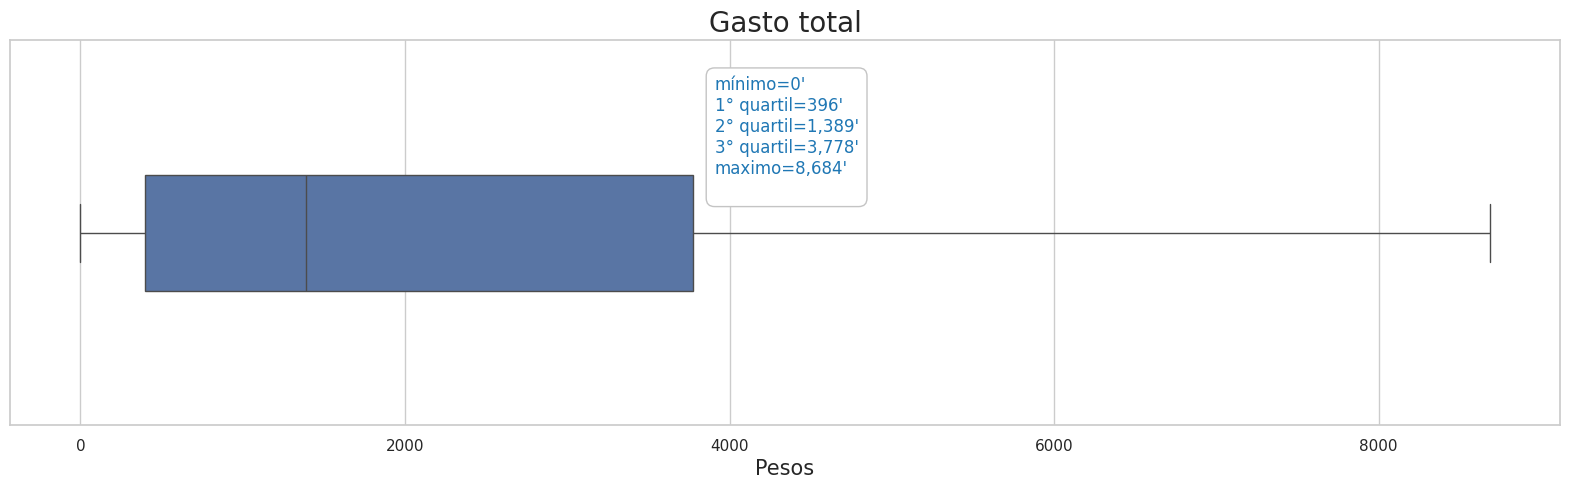

In [358]:
# Colores Zoop
GRIS_1 = '#F5F5F5'
GRIS_3 = '#C4C4C4'
GRIS_5 = '#4F4F4F'
AZUL_1 = '#1F77B4'
AQUA_1 = '#17BECF'
BLANCO = '#FFFFFF'

# Crear el boxplot
ax=sns.boxplot(data=datos_modificados['Monto total según meses contratados'],orient='h',width=0.3)

# Configurar tamaño y títulos
ax.figure.set_size_inches(20,5)
ax.set_title('Gasto total',fontsize=20)
ax.set_xlabel('Pesos',fontsize=15)

#Construir texto con valores estadísticos
texto_valor=(
    f"mínimo={datos_modificados['Monto total según meses contratados'].min():,.0f}'\n"
    f"1° quartil={datos_modificados['Monto total según meses contratados'].quantile(0.25):,.0f}'\n"
    f"2° quartil={datos_modificados['Monto total según meses contratados'].median():,.0f}'\n"
    f"3° quartil={datos_modificados['Monto total según meses contratados'].quantile(0.75):,.0f}'\n"
    f"maximo={datos_modificados['Monto total según meses contratados'].max():,.0f}'\n"

)

ax.text(
    x=datos['Monto total según meses contratados'].max()*0.45,
    y=-0.1,
    s=texto_valor,
    fontsize=12,
    color=AZUL_1,
    bbox=dict(boxstyle='round,pad=0.5',facecolor=BLANCO,edgecolor=GRIS_3)

)

plt.show()


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**6. VALIDACIÓN DE MODELOS**

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=5)

##**6.1 Modelo de referencia _Baseline**

In [361]:
from sklearn.dummy import DummyClassifier

In [362]:
dummy = DummyClassifier(random_state=5)
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)


0.7429829389102917

**Modelo de referencia (baseline)**
<div align='justify'>
Se utilizó un DummyClassifier como modelo de referencia, el cual predice la clase mayoritaria sin considerar las características del cliente. Este modelo alcanzó una exactitud de 74.3%, lo que refleja el desequilibrio en la variable objetivo. Este resultado establece un umbral mínimo que los modelos entrenados deben superar para considerarse útiles. En particular, se espera que modelos como árboles de decisión, Random Forest o XGBoost logren mejorar la capacidad de detección de cancelaciones (clase minoritaria), especialmente en métricas como recall y F1-score.
</div>




##**6.1.1 Matriz de confusión (Dummy)**

In [363]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_dummy = dummy.predict(X_test)

print(confusion_matrix(y_test, y_pred_dummy))

[[1350    0]
 [ 467    0]]


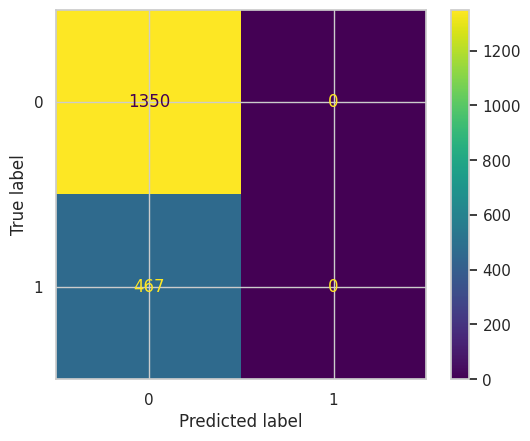

In [364]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix_confusion = confusion_matrix(y_test, y_pred_dummy)
visualizacion = ConfusionMatrixDisplay(matrix_confusion)
visualizacion.plot()

In [365]:
print(classification_report(y_test, y_pred_dummy, digits=4))

              precision    recall  f1-score   support

           0     0.7430    1.0000    0.8525      1350
           1     0.0000    0.0000    0.0000       467

    accuracy                         0.7430      1817
   macro avg     0.3715    0.5000    0.4263      1817
weighted avg     0.5520    0.7430    0.6334      1817



In [366]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print(f'Exactitud    : {accuracy_score(y_test, y_pred_dummy):,.4f}')
print(f'Precisión    : {precision_score(y_test, y_pred_dummy):,.4f}')
print(f'Sencibilidad : {recall_score(y_test, y_pred_dummy):,.4f}')
print(f'F1           : {f1_score(y_test, y_pred_dummy):,.4f}')

Exactitud    : 0.7430
Precisión    : 0.0000
Sencibilidad : 0.0000
F1           : 0.0000


###**🧠 ¿Qué esperar?**

Dado que el DummyClassifier predice siempre la clase mayoritaria (Churn = 0), la matriz se interpreta:

| Predicción ↓ / Real → | No canceló (0) | Canceló (1) |
|:---------------------:|:--------------:|:-----------:|
| No canceló (0)        |      1138      |      0      |
| Canceló (1)           |       388      |      0      |


- Recall para cancelaciones: 0.00 → no detecta ningún cliente que cancela.
- F1-score para cancelaciones: 0.00 → completamente inútil para la clase minoritaria.




**📌 Análisis para la matriz de confusión (Dummy)**
<div align='justify'>
Comparación con modelo de referencia
El DummyClassifier, que predice siempre la clase mayoritaria, obtuvo una exactitud de 74.3%, pero falló completamente en detectar cancelaciones (Churn = 1). La matriz de confusión muestra que no identificó ni un solo cliente que canceló, lo que se traduce en un recall y F1-score de 0.00 para esa clase. En contraste, el árbol de decisión (como se logra ver a continuación) logró detectar el 47.67% de los casos de cancelación, demostrando una mejora sustancial en la capacidad predictiva.
</div>


##**6.2 Árbol de decisión**

In [367]:
from sklearn.tree import DecisionTreeClassifier

In [368]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

In [369]:

modelo_arbol.score(X_test,y_test)

0.7314254265272427

###**6.2.1 Matriz de Confusión árbol de decisión**

In [370]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_arbol = modelo_arbol.predict(X_test)

print(confusion_matrix(y_test, y_pred_arbol))


[[1114  236]
 [ 252  215]]


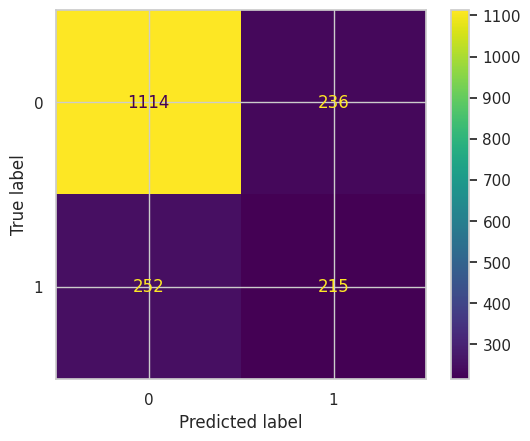

In [371]:
matriz_confusion = confusion_matrix(y_test, y_pred_arbol)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [372]:
print(classification_report(y_test, y_pred_arbol, digits=4))

              precision    recall  f1-score   support

           0     0.8155    0.8252    0.8203      1350
           1     0.4767    0.4604    0.4684       467

    accuracy                         0.7314      1817
   macro avg     0.6461    0.6428    0.6444      1817
weighted avg     0.7284    0.7314    0.7299      1817



In [373]:
print(f'Exactitud    : {accuracy_score(y_test, y_pred_arbol):,.4f}')
print(f'Precisión    : {precision_score(y_test, y_pred_arbol):,.4f}')
print(f'Sencibilidad : {recall_score(y_test, y_pred_arbol):,.4f}')
print(f'F1           : {f1_score(y_test, y_pred_arbol):,.4f}')

Exactitud    : 0.7314
Precisión    : 0.4767
Sencibilidad : 0.4604
F1           : 0.4684


###**📊 Matriz de confusión**

| Predicción ↓ / Real → | No canceló (0) | Canceló (1) |
|:---------------------:|:--------------:|:-----------:|
| No canceló (0)        |     1114       |    236      |
| Canceló (1)           |      252       |    215      |


- 236 falsos positivos (predijo cancelación cuando no hubo).
- 215 verdaderos positivos: clientes que cancelaron y fueron correctamente detectados.
- 252 falsos negativos (predijo no cancelación cuando si hubo)
-1114 verdadedos negativos: clientes que no cancelaron y fueron correctamente detectados.




###**🧠 Métricas clave**

| Métrica   | Clase 0 (No canceló) | Clase 1 (Canceló) |
|:---------:|:--------------------:|:-----------------:|
| Precision | 0.8155               | 0.4767            |
| Recall    | 0.8252               | 0.4604            |
| F1-score  | 0.8203               | 0.4684            |


- Accuracy total: 81.55% → muy superior al baseline (74.3%)
- Recall para cancelaciones: 46.04% → muy superior al baseline (0%)
- F1-score para cancelaciones: 46.84% → muy superior al baseline (0%)


###**🔍 Comparación de modelos**

| Modelo          | Accuracy (.score()) |
|:---------------:|:-------------------:|
| DummyClassifier | 0.7430               |
| DecisionTree    | 0.7314               |


<div align='justify'>

**Análisis de la matriz de confusión del árbol de decisión:** Aunque el árbol tiene una exactitud ligeramente superior al modelo dummy, este resultado no implica el mejor desempeño. El `DummyClassifier` predice siempre la clase mayoritaria, ignorando por completo las cancelaciones. En cambio, el árbol de decisión logra identificar correctamente una proporción  de clientes que cancelan, lo que se refleja en métricas como el recall y el F1-score para la clase minoritaria. Por lo tanto, el árbol aporta valor predictivo real y puede ser refinado para mejorar su balance entre precisión y cobertura.
</div>

In [374]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [375]:
valores_columnas = [
    'Género del cliente_Mujer',
    'INTERNET_DSL',
    'INTERNET_Fiber optic',
    'INTERNET_No',
    'Tipo de contrato_Month-to-month',
    'Tipo de contrato_One year',
    'Tipo de contrato_Two year',
    'Forma de pago_Bank transfer (automatic)',
    'Forma de pago_Credit card (automatic)',
    'Forma de pago_Electronic check',
    'Forma de pago_Mailed check',
    'Cliente senior',
    'Relación de pareja',
    'Dependientes',
    'Meses de contrato',
    'Servicio telefónico',
    'Múltiples líneas telefónicas',
    'Seguridad en línea (INTERNET)',
    'Respaldo en línea (INTERNET)',
    'Protección del dispositivo (INTERNET)',
    'Soporte técnico (INTERNET)',
    'Televisión por cable',
    'Streaming de películas',
    'Factura en línea',
    'Monto mensual',
    'Monto total según meses contratados',
    'Monto diario',
]

##**6.3 Gráfico de árbol de decisión**

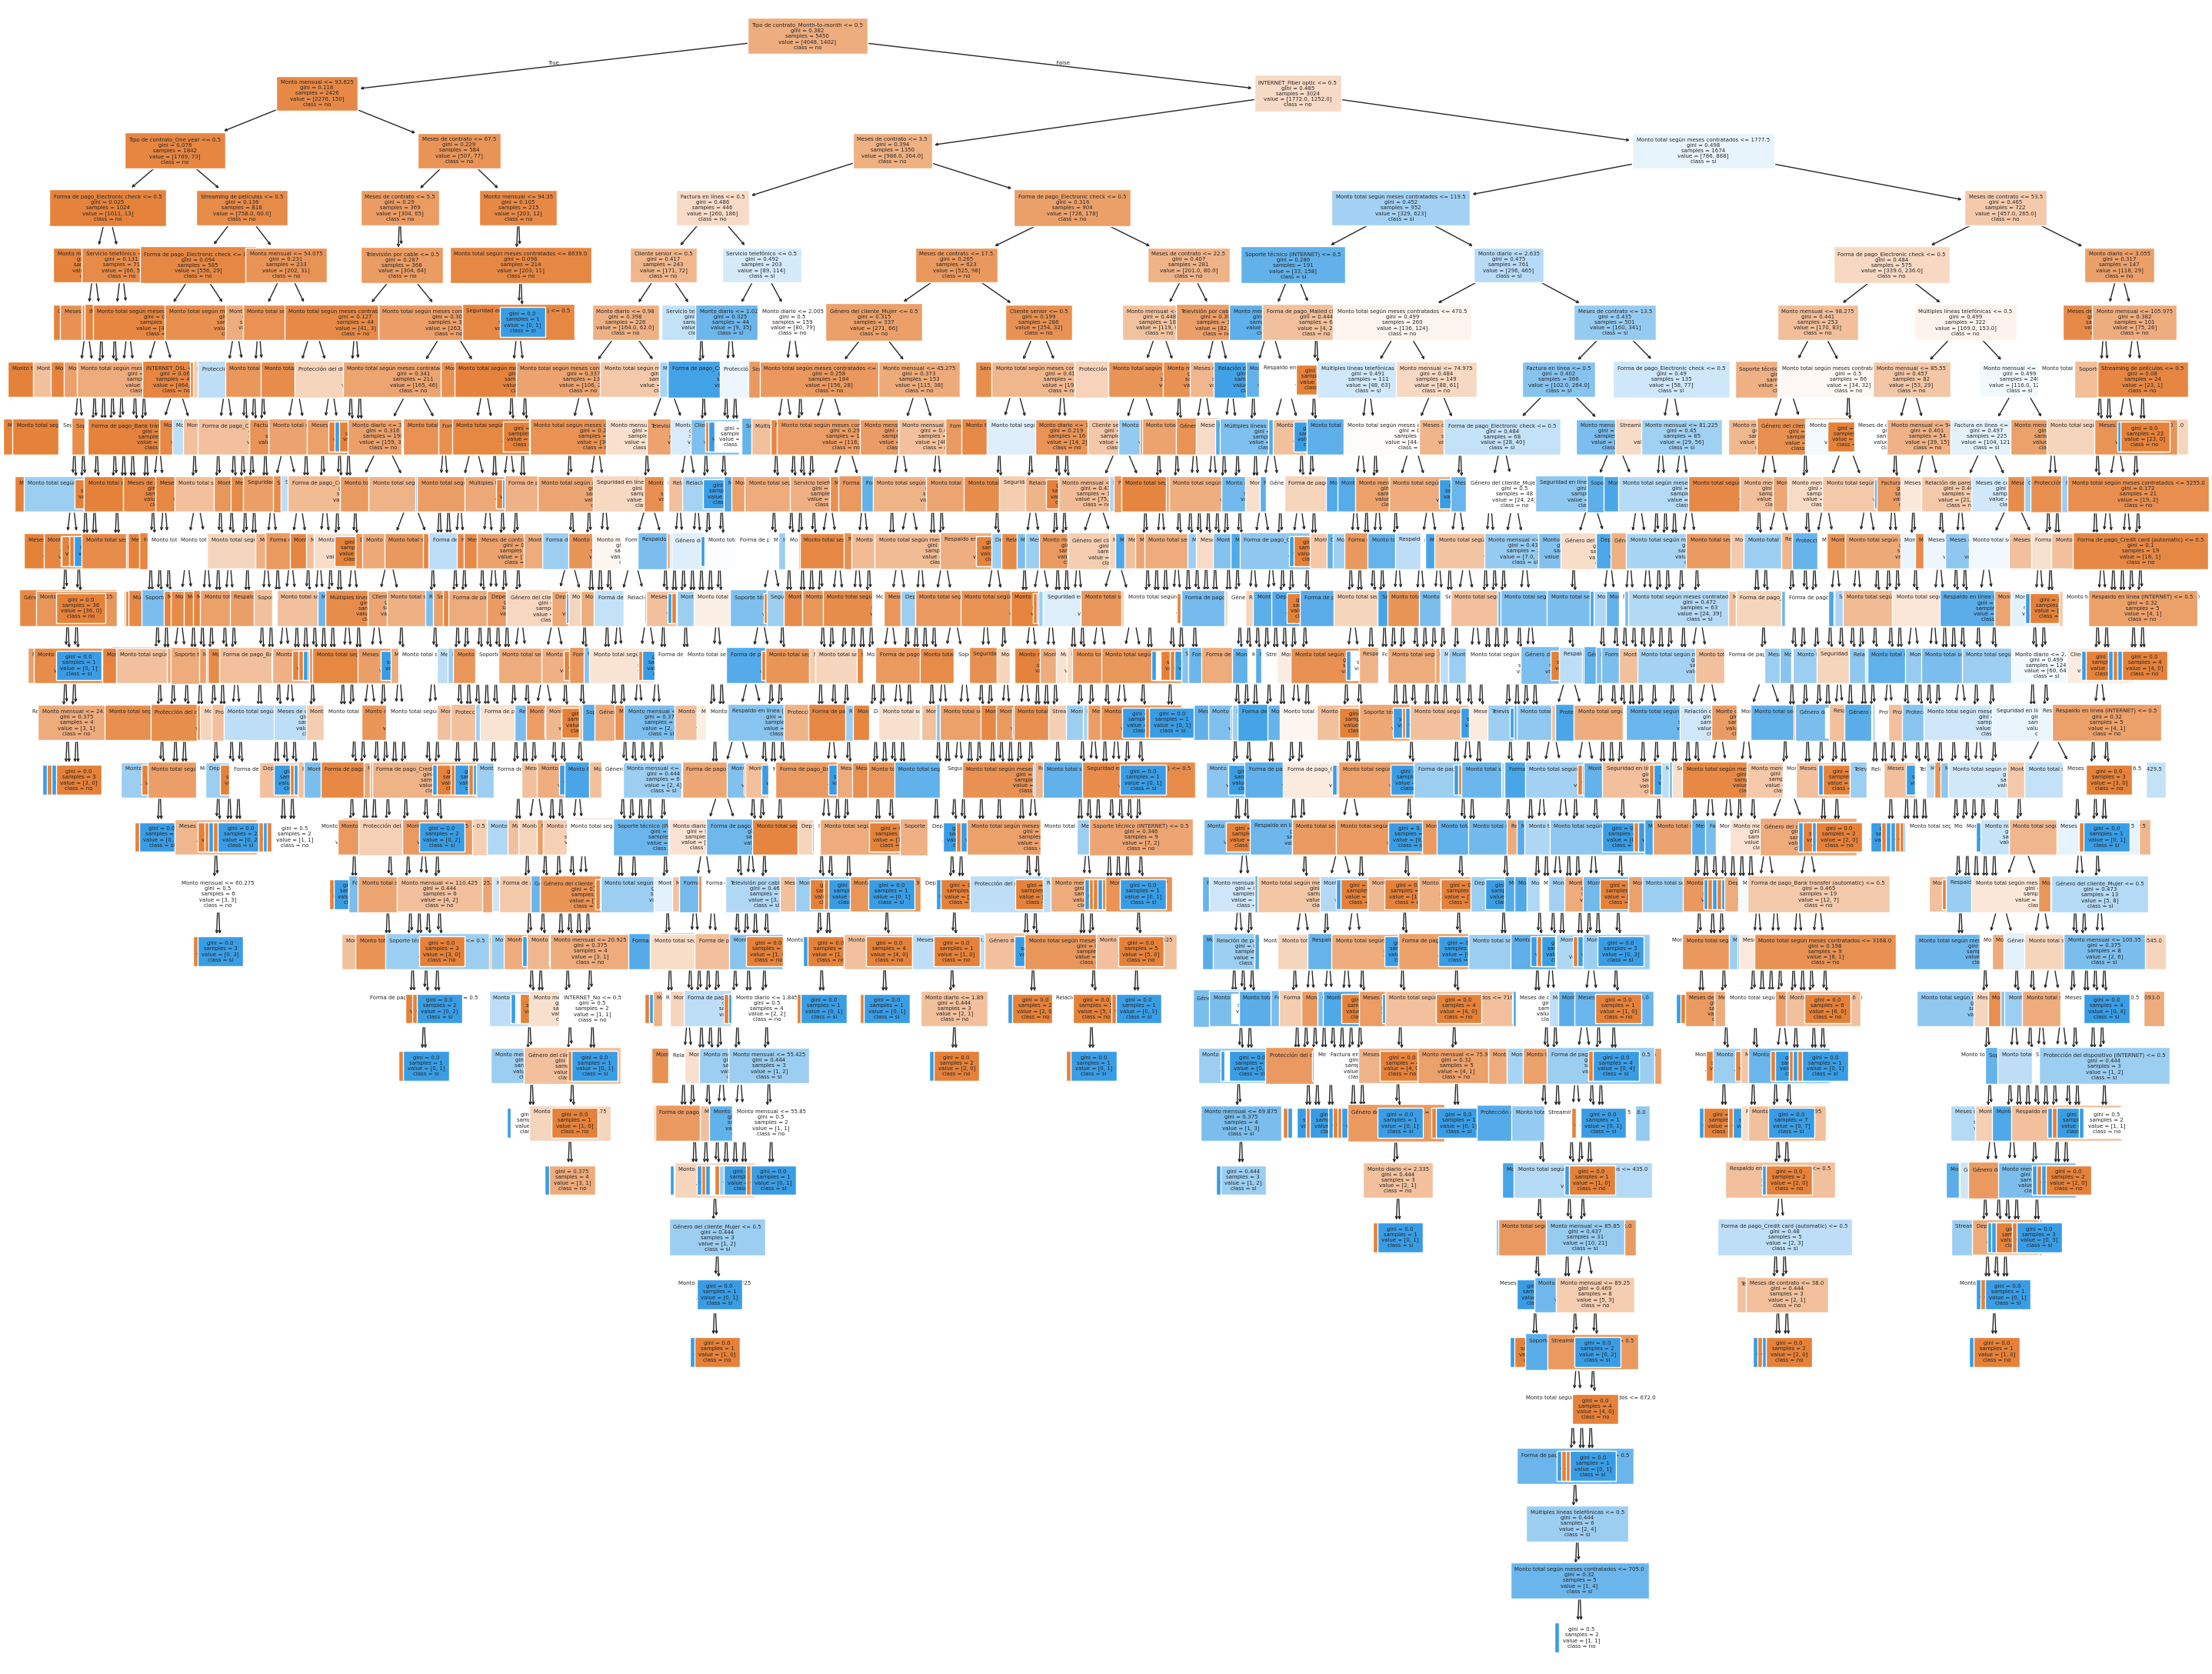

In [376]:
plt.figure(figsize=(35, 28))
plot_tree(modelo_arbol, filled=True, class_names=['no', 'si'], fontsize=5, feature_names=valores_columnas);


In [377]:
modelo_arbol.score(X_train,y_train)

0.9913761467889908

In [378]:
modelo_arbol.score(X_test,y_test)

0.7314254265272427

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**7. SELECCIÓN DE MODELO**

##**7.1 Normalizando el modelo**

###**🌟 Usar MinMaxScaler:**
  para normalizar las variables numéricas es especialmente útil cuando se trabaja con modelos sensibles a escalas, como:

- K-Nearest Neighbors
- Regresión logística
- Redes neuronales
- Y en general, cualquier algoritmo que dependa de distancias o cálculos geométricos.





###**🔍 ¿Por qué esta normalización no afecta a árboles?**

<div align='justify'>
En el flujo de trabajo con DecisionTreeClassifier y RandomForestClassifier, la normalización no es obligatoria ni tiene efecto sobre el rendimiento del modelo, porque:

- Los árboles basan sus decisiones en umbrales de división, no en distancias o magnitudes relativas.
- Se puede entrenar directamente sobre los datos codificados y el árbol los manejará sin necesidad de escalar.

Se está preparando el conjunto para comparar con otros modelos (por ejemplo LogisticRegression o KNN), por lo tanto, tener X_train_normalizado listo es un excelente paso.

La normalización se aplicó solo a modelos sensibles a escala.

</div>


In [379]:
from sklearn.preprocessing import MinMaxScaler

In [380]:
# Normalizamos los datos SOLO para modelos sensibles a escala
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [381]:
X_test_normalizado = normalizacion.transform(X_test)

In [382]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.658865,0.661677,0.656716
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.222610,0.172041,0.220896
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.559263,0.103178,0.558209
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.760956,0.305044,0.761194
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.569223,0.061377,0.567164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.829183,0.104330,0.826866
5446,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070717,0.000000,0.071642
5447,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.223606,0.051704,0.223881
5448,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.372012,0.232151,0.370149


##**7.2 KNN**

In [383]:
from sklearn.neighbors import KNeighborsClassifier


In [384]:
# Normalizamos los datos SOLO para modelos sensibles a escala
normalizador = MinMaxScaler()
X_train_escalado = normalizador.fit_transform(X_train)
X_test_escalado = normalizador.transform(X_test)

# Creamos y entrenamos el modelo KNN

knn = KNeighborsClassifier()
knn.fit(X_train_escalado,y_train)

KNeighborsClassifier()

In [385]:
X_test_normalizado = normalizacion.transform(X_test)

In [386]:
knn.score(X_test_escalado,y_test)

0.7583929554210237

###**7.2.1 Matriz de confusión (KNN)**

In [387]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_knn = knn.predict(X_test_escalado)

print(confusion_matrix(y_test, y_pred_knn))


[[1163  187]
 [ 252  215]]


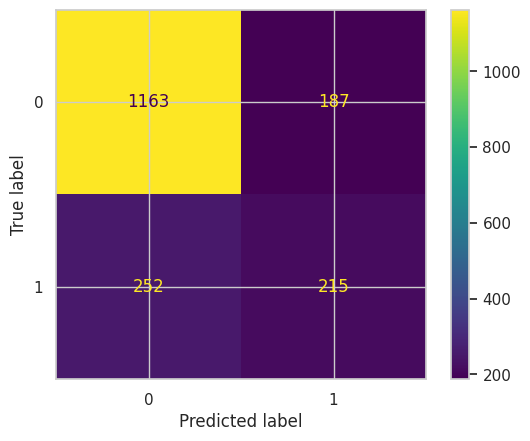

In [388]:
matrix_confusion = confusion_matrix(y_test, y_pred_knn)
visualizacion= ConfusionMatrixDisplay(matrix_confusion)
visualizacion.plot()

In [389]:
print(classification_report(y_test, y_pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.8219    0.8615    0.8412      1350
           1     0.5348    0.4604    0.4948       467

    accuracy                         0.7584      1817
   macro avg     0.6784    0.6609    0.6680      1817
weighted avg     0.7481    0.7584    0.7522      1817



In [390]:
print(f'Exactitud    : {accuracy_score(y_test, y_pred_knn):,.4f}')
print(f'Precisión    : {precision_score(y_test, y_pred_knn):,.4f}')
print(f'Sencibilidad : {recall_score(y_test, y_pred_knn):,.4f}')
print(f'F1           : {f1_score(y_test, y_pred_knn):,.4f}')

Exactitud    : 0.7584
Precisión    : 0.5348
Sencibilidad : 0.4604
F1           : 0.4948


##**7.3 Escogiendo y serializando el mejor modelo**

In [391]:
lista=[('dunny',dummy,X_test),('de arbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo(i[0];{i[1].score(i[2],y_test):,.4f})')

La exactitud del modelo(i[0];0.7430)
La exactitud del modelo(i[0];0.7314)
La exactitud del modelo(i[0];0.7584)


**📊 Matriz de confusión del KNN**

| Predicción ↓ / Real → | No canceló (0) | Canceló (1) |
|:---------------------:|:--------------:|:-----------:|
| No canceló (0)        |       1163     |     187     |
| Canceló (1)           |        252     |     215     |


**🧠 Métricas clave**

| Métrica   | Clase 0 (No canceló) | Clase 1 (Canceló) |
|:---------:|:--------------------:|:-----------------:|
| Precision |        0.8219        |       0.5348      |
| Recall    |        0.8615        |       0.4604      |
| F1-score  |        0.8412        |       0.4948      |


-


- Accuracy total: 75.84% → mejor que el baseline y el árbol de decisión
- Recall para cancelaciones: 46.04% → detecta menos de la mitad de los clientes que cancelan
- F1-score para cancelaciones: 49.48% → rendimiento moderado


###**📊 Resultado comparativo**


| Modelo   | Accuracy en test |
|:--------:|:----------------:|
| Dummy    | 0.7430           |
| Árbol    | 0.7314           |
| KNN      |  0.7584 ✅       |



**📌Evaluación del modelo KNN**

<div align='justify'>
El modelo KNN alcanzó una exactitud de 75.84%, superando al modelo de referencia. Sin embargo, su capacidad para detectar cancelaciones es limitada: solo identifica correctamente el 46.04% de los clientes que cancelan (Churn = 1). Esto se refleja en un F1-score de 49.48% para la clase minoritaria.
</div>



In [392]:
import pickle

In [393]:
with open('modelo_onehotenconder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [394]:
with open('modelo_arbol.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [395]:
datos

,Churn,Género del cliente,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,INTERNET,Seguridad en línea (INTERNET),...,Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Monto mensual,Monto total según meses contratados,Monto diario
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593,2.19
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542,2.00
2,1,Hombre,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280,2.46
3,1,Hombre,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237,3.27
4,1,Mujer,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Mujer,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742,1.84
7263,1,Hombre,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873,2.84
7264,0,Hombre,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92,1.68
7265,0,Hombre,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627,2.26


____________________________________________________________________________________________________________________________________________________________________________________________________________

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**8. MODELADO PREDICTIVO DE CLASIFICACIÓN BINARIA**


El modelo:

- Aprende patrones del pasado (historial de clientes).
- Generaliza esos patrones para hacer predicciones sobre nuevos datos.
- No solo describe o clasifica: anticipa resultados futuros como cancelación de servicio, riesgo crediticio, etc.

- En este caso la salida del modelo es categórica (0 o 1, es decir, no cancela o cancela).



In [396]:
nuevo_dato = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'No',
    'Tipo de contrato': 'One year',
    'Forma de pago': 'Mailed check',
    'Cliente senior': 0,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 12,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 0,
    'Monto mensual': 100,
    'Monto total según meses contratados': 1000,
    'Monto diario': 2
    }

In [397]:
nuevo_dato = pd.DataFrame([nuevo_dato])

In [398]:
nuevo_dato

,Género del cliente,INTERNET,Tipo de contrato,Forma de pago,Cliente senior,Relación de pareja,Dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas telefónicas,Seguridad en línea (INTERNET),Respaldo en línea (INTERNET),Protección del dispositivo (INTERNET),Soporte técnico (INTERNET),Televisión por cable,Streaming de películas,Factura en línea,Monto mensual,Monto total según meses contratados,Monto diario
0,Mujer,No,One year,Mailed check,0,1,1,12,1,0,0,0,0,0,1,1,0,100,1000,2


In [399]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenconder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_arbol.pkl')

In [400]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)



In [401]:
nuevo_dato

array([[   1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.,    0.,    1.,    1.,   12.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    1.,    0.,  100., 1000.,    2.]])

In [402]:
modelo_arbol.predict(nuevo_dato)

array([1])

In [403]:
modelo_arbol.predict_proba(nuevo_dato)

array([[0., 1.]])

**Evaluación de probabilidad de cancelación**
<div align='justify'>
El modelo de árbol de decisión asignó una probabilidad de 100% de churn al perfil evaluado. Esta certeza se debe a que el cliente coincide con patrones de cancelación observados en el conjunto de entrenamiento, como contrato anual, pocos servicios digitales y monto mensual elevado. Aunque esta predicción es categórica, se recomienda complementar con modelos probabilísticos más calibrados (e.g., Random Forest, XGBoost) para obtener estimaciones más matizadas.
</div>

##**8.1 Introducción a modelos predictivos**

<div align='justify'>
Se desarrolló un modelo predictivo supervisado orientado a clasificación binaria, con el objetivo de anticipar la probabilidad de cancelación de clientes según características de servicio y comportamiento histórico
</div>

In [404]:
def predecir_churn(nuevo_dato_dict, modelo, codificador, normalizador=None):
    import pandas as pd

    # Convertir a DataFrame
    nuevo_dato_df = pd.DataFrame([nuevo_dato_dict])

    # One-hot encoding
    nuevo_dato_codificado = codificador.transform(nuevo_dato_df)

    # Escalar si el modelo lo requiere
    if normalizador:
        nuevo_dato_codificado = normalizador.transform(nuevo_dato_codificado)

    # Predicción
    pred_clase = modelo.predict(nuevo_dato_codificado)
    pred_proba = modelo.predict_proba(nuevo_dato_codificado)

    return pred_clase[0], pred_proba[0]

In [405]:
cliente_fiel = {
    'Género del cliente': 'Hombre',
    'INTERNET': 'Fiber optic',
    'Tipo de contrato': 'Two year',
    'Forma de pago': 'Bank transfer (automatic)',
    'Cliente senior': 1,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 36,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 1,
    'Seguridad en línea (INTERNET)': 1,
    'Respaldo en línea (INTERNET)': 1,
    'Protección del dispositivo (INTERNET)': 1,
    'Soporte técnico (INTERNET)': 1,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 1,
    'Monto mensual': 89.95,
    'Monto total según meses contratados': 3238.2,
    'Monto diario': 2.45
}

cliente_volatil = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'DSL',
    'Tipo de contrato': 'Month-to-month',
    'Forma de pago': 'Electronic check',
    'Cliente senior': 0,
    'Relación de pareja': 0,
    'Dependientes': 0,
    'Meses de contrato': 1,
    'Servicio telefónico': 0,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 0,
    'Streaming de películas': 0,
    'Factura en línea': 0,
    'Monto mensual': 49.90,
    'Monto total según meses contratados': 49.90,
    'Monto diario': 1.66
}

cliente_neutro = {
    'Género del cliente': 'Mujer',
    'INTERNET': 'No',
    'Tipo de contrato': 'One year',
    'Forma de pago': 'Mailed check',
    'Cliente senior': 0,
    'Relación de pareja': 1,
    'Dependientes': 1,
    'Meses de contrato': 12,
    'Servicio telefónico': 1,
    'Múltiples líneas telefónicas': 0,
    'Seguridad en línea (INTERNET)': 0,
    'Respaldo en línea (INTERNET)': 0,
    'Protección del dispositivo (INTERNET)': 0,
    'Soporte técnico (INTERNET)': 0,
    'Televisión por cable': 1,
    'Streaming de películas': 1,
    'Factura en línea': 0,
    'Monto mensual': 65.5,
    'Monto total según meses contratados': 786.0,
    'Monto diario': 2.18
}

In [406]:
resultado, probas = predecir_churn(cliente_volatil, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=0.60, Cancelaría=0.40


In [407]:
resultado, probas = predecir_churn(cliente_fiel, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=1.00, Cancelaría=0.00


In [408]:
resultado, probas = predecir_churn(cliente_neutro, knn, modelo_one_hot, normalizacion)
print(f"Predicción: {'Cancelaría' if resultado == 1 else 'No cancelaría'}")
print(f"Probabilidades: No cancelaría={probas[0]:.2f}, Cancelaría={probas[1]:.2f}")

Predicción: No cancelaría
Probabilidades: No cancelaría=1.00, Cancelaría=0.00


###**🎯 ¿Por qué es útil trabajar con datos simulados?**

- Validar si el modelo responde como se espera ante distintos perfiles.
- Generar contraejemplos: ¿qué pasa si el cliente tiene contrato largo pero paga por transferencia electrónica?
- Comprobar si ciertos atributos tienen más peso en la decisión final del modelo.


##**8.2 Separación de datos (validando el modelo)**

In [409]:
from sklearn.model_selection import train_test_split

In [410]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5
)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

5086 2181
5086 2181


###**🧠 ¿Por qué es importante esto?**
<div align='justify'>
- Permite entrenar el modelo en una porción de los datos y evaluar su capacidad de generalización sobre casos que nunca ha visto.
- Evita el sobreajuste (overfitting), que ocurre cuando el modelo “memoriza” los datos en vez de aprender patrones.

“Se realizó una partición estratificada de los datos en conjuntos de entrenamiento (70%) y prueba (30%) mediante la función train_test_split, utilizando una semilla fija (random_state=5) para asegurar la reproducibilidad del experimento.”
</div>

In [411]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=5)

In [412]:
modelo=DecisionTreeClassifier(random_state=5)
modelo.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento : {modelo.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación    : {modelo.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento : 0.9932
Exactitud del modelo en validación    : 0.7311


**Primera división (X, X_test, y, y_test):**
- Se separó los datos de prueba finales: 30% de los datos se reservan para medir el rendimiento final.
- Usar stratify=y para mantener el equilibrio de clases (¡clave en clasificación binaria!).

**Segunda división (X_train, X_val, y_train, y_val):**

- De los datos restantes (70%), se realizó otra separación interna:
- Entrenamiento del modelo: X_train, y_train.
- Validación temprana: X_val, y_val.

**Entrenamiento y evaluación:**

- Entrenar con DecisionTreeClassifier().
- Evaluar exactitud en entrenamiento y validación:
- 📈 Entrenamiento: 0.9932 → muy alta, ¡casi perfecta!
- 🧪 Validación: 0.7311 → más realista, muestra que el modelo no generaliza tan bien.

###**⚠️ ¿Podría estar viendo sobreajuste?**

Sí. El árbol ha aprendido muy bien los datos de entrenamiento (casi demasiado bien), pero su rendimiento cae en datos no vistos.
Esto sugiere que el modelo:
- Podría estar memorizando ejemplos en lugar de aprender patrones.
- Tiene alta complejidad (muchas ramas que se ajustan al ruido del dataset).




**Evaluación inicial del modelo de árbol de decisión**

<div align='justify'>
Se entrenó un modelo DecisionTreeClassifier utilizando una separación estratificada en conjuntos de entrenamiento y validación. El modelo alcanzó una exactitud de 99.32% en entrenamiento, pero solo 73.11% en validación, lo que sugiere un claro sobreajuste. Esta discrepancia indica que el árbol está capturando patrones específicos del conjunto de entrenamiento que no se replican en datos nuevos. Para mitigar este efecto, se recomienda aplicar técnicas de regularización (e.g., limitar la profundidad del árbol) o utilizar modelos más robustos como Random Forest o XGBoost.

</div>


###**🧠 Observaciones clave**



| Métrica        | Valor |
|:--------------:|:-----:|
| Accuracy train | 0.9932 |
| Accuracy test  | 0.7311 |


La enorme diferencia entre entrenamiento y prueba indica que el árbol aprendió demasiado bien los datos de entrenamiento, pero no sabe generalizar bien. Es típico de modelos de árboles sin restricciones, que tienden a memorizar en vez de aprender patrones útiles.


In [413]:
modelo=DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento : {modelo.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación    : {modelo.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento : 0.8041
Exactitud del modelo en validación    : 0.8074


###**🌳 ¿Qué cambió?**

**📊 Comparación antes vs después**

| Parámetro       | Entrenamiento | Validación | Gap        |
|:---------------:|:-------------:|:----------:|:----------:|
| Sin restricción | 0.9932        | 0.7311     | 🔴 26.21% |
| max_depth=5     | 0.8041        | 0.8074     | 🟢 0.33%  |





- Entrenamiento: bajó de 0.9932 → 0.8041
- Validación: subió de 0.7311 → 0.8074

Este cambio sugiere que el modelo dejó de “memorizar” y empezó a generalizar mejor. ¡Una mejora muy sólida!


###**🧠 ¿Por qué max_depth=5 ayuda?**

- Limita la complejidad del árbol.
- Evita que se formen ramas innecesarias que se ajustan al ruido del dataset.
- Mejora la capacidad del modelo de adaptarse a nuevos datos sin perder precisión.


<div align='justify'>
“Al restringir la profundidad máxima del árbol (max_depth=5), se logró un mejor balance entre exactitud en el conjunto de entrenamiento (80.41%) y validación (80.74%). Esta estrategia permitió reducir el sobreajuste observado inicialmente, mejorando la capacidad de generalización del modelo de clasificación binaria.
</div>


##**8.3 Matriz de confusión sin balanceo**

###**8.3.1 Introducción**
<div align='justify'>
Para establecer una línea base confiable, se entrenó un modelo sin aplicar técnicas de balanceo y se evaluó inmediatamente después de la partición de datos. Esto garantizó que el conjunto de prueba (2181 muestras) reflejara la distribución original de clases. La matriz de confusión obtenida permitió observar el sesgo del modelo hacia la clase mayoritaria, evidenciando la necesidad de aplicar técnicas de balanceo en el conjunto de entrenamiento.
</div>




In [414]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

modelo_base = DecisionTreeClassifier(max_depth=5, random_state=5)
modelo_base.fit(X_train, y_train)
y_pred_base = modelo_base.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_pred_base)
print(matriz_confusion)

[[1521   99]
 [ 386  175]]


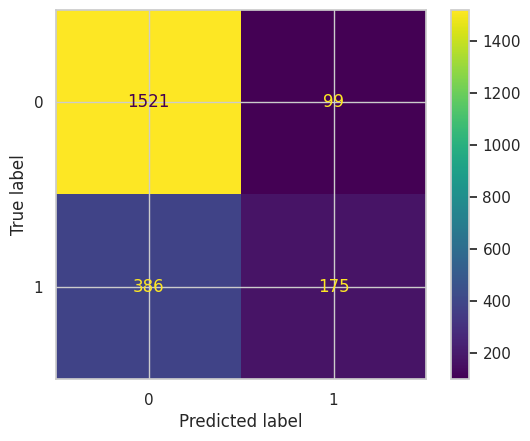

In [415]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [416]:
print("Reporte sin balanceo:")
print(classification_report(y_test, y_pred_base))

Reporte sin balanceo:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1620
           1       0.64      0.31      0.42       561

    accuracy                           0.78      2181
   macro avg       0.72      0.63      0.64      2181
weighted avg       0.76      0.78      0.75      2181



In [417]:
print(f'Exactitud    : {accuracy_score(y_test, y_pred_base):,.4f}')
print(f'Precisión    : {precision_score(y_test, y_pred_base):,.4f}')
print(f'Sencibilidad : {recall_score(y_test, y_pred_base):,.4f}')
print(f'F1           : {f1_score(y_test, y_pred_base):,.4f}')

Exactitud    : 0.7776
Precisión    : 0.6387
Sencibilidad : 0.3119
F1           : 0.4192


###**🔍 ¿Qué significa esto?**

- Clase 0 (mayoritaria): El modelo predice muy bien (94% recall), lo que indica que casi todos los verdaderos 0 fueron detectados.
- Clase 1 (minoritaria): El modelo falla bastante. Solo detecta correctamente 175 de 561 casos (31% recall), y se equivoca en 386.
- Sesgo claro hacia la clase mayoritaria, típico de modelos entrenados sin técnicas de balanceo.


**Evaluación sin balanceo de clases**

<div align='justify'>
Al entrenar el modelo sin aplicar técnicas de balanceo, se observa un rendimiento desigual entre clases. Aunque la exactitud global alcanza el 78%, el modelo solo detecta el 31% de los clientes que cancelan (Churn = 1). Esto se refleja en un F1-score de 42% para la clase minoritaria, lo que indica una baja utilidad práctica para estrategias de retención. Estos resultados justifican la necesidad de aplicar técnicas de balanceo como SMOTE, NearMiss o ajuste de pesos para mejorar la sensibilidad del modelo ante cancelaciones

</div>




##**8.4 Matriz de confusión con validación**

In [418]:
modelo=DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_train,y_train)
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[897  48]
 [197 130]]


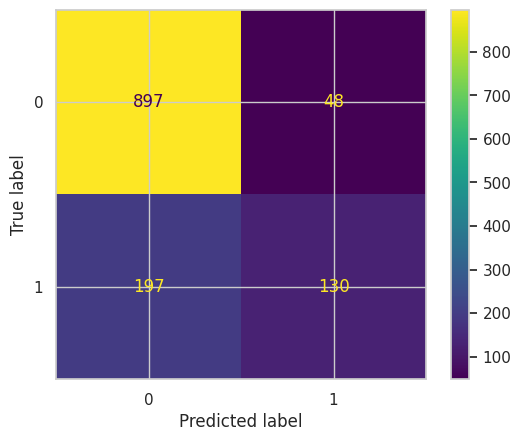

In [419]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

| Concepto      | True label | Predict label |
|:-------------:|:----------:|:-------------:|
| No cancelado  |    0       |      0        |
| Cancelado     |    1       |      1        |



                          
|Cod.|   Descripción       | Concepto |N° Datos|    Comentarios                                                                       |
|:--:|:-------------------:|:--------:|:------:|:------------------------------------------------------------------------------------:|
| TN | Verdadero Negativo  | 0-0      |   897  |<div align='justify'>El modelo predice bien los 897 clientes que no cancelaron.       |
| FN | Falso Negativo      | 1-0      |   197  |<div align='justify'>El modelo predice 197 clientes como que no cancelaron pero       |
|    |                     |          |        |<div align='justify'>en realidad si cancelaron.                                       |
| FP | Falso Positivo      | 0-1      |    48  |<div align='justify'>El modelo predice 48 clientes como que cancelaron pero en        |
|    |                     |          |        |<div align='justify'>realidad no cancelatron.                                         |
| TP | Verdadero Positivo  | 1-1      |   130  |<div align='justify'>El modelo predice bien los 130 clientes que si cancelaron.       |     


In [420]:
print(classification_report(y_val,y_previsto))
# support la cantidad de muestra que soporta estos valores
#  macro avg   = promedio general
# weighted avg = promedio ponderado

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       945
           1       0.73      0.40      0.51       327

    accuracy                           0.81      1272
   macro avg       0.78      0.67      0.70      1272
weighted avg       0.80      0.81      0.79      1272



###**📊 Métricas globales**

1. **Accuracy:** 0.81 → rendimiento global decente, pero puede ocultar problemas en clases minoritarias.
2. **Macro avg:** (promedio simple entre clases)
- Precision: 0.78
- Recall: 0.67
- F1: 0.70
- Ideal para conjuntos desbalanceados.
3. **Weighted avg:** (ponderado según el tamaño de cada clase)
- Precision: 0.80
- Recall: 0.81
- F1: 0.79
- Representa el rendimiento general, pero está influenciado por el buen desempeño en la clase 0.


###**📌 Métricas por clase**

| Clase          | Precision | Recall | F1-score | Support | Interpretación                                                               |
|:--------------:|:---------:|:------:|:--------:|:-------:|:----------------------------------------------------------------------------:|
| 0 (no cancela) | 0.82      | 0.95   | 0.88     | 945     |<div align='justify'> El modelo identifica correctamente la mayoría de los no |
|                |           |        |          |         |<div align='justify'>canceladores, con muy pocos falsos positivos.            |
|                |           |        |          |         |                                                                              |
| 1 (cancela)    | 0.73      | 0.40   | 0.51     | 327     |<div align='justify'>Aquí está el talón de Aquiles: el modelo solo detecta el |  
|                |           |        |          |         |<div align='justify'>40% de los clientes que cancelan, aunque cuando lo hace, |
|                |           |        |          |         |<div align='justify'>el 73% realmente cancela.                                |
|                |           |        |          |         |                                                                              |
                                                                              






In [421]:
y.shape

(5086,)

In [422]:
5086/4

1271.5

In [423]:
len(y_val)

1272

In [424]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [425]:
print(f'Exactitud    : {accuracy_score(y_val,y_previsto):,.4f}')
print(f'Precisión    : {precision_score(y_val,y_previsto):,.4f}')
print(f'Sencibilidad : {recall_score(y_val,y_previsto):,.4f}')
print(f'F1           : {f1_score(y_val,y_previsto):,.4f}')

Exactitud    : 0.8074
Precisión    : 0.7303
Sencibilidad : 0.3976
F1           : 0.5149


###**🎯 Interpretación:**

- El modelo es bastante bueno en general (80% de aciertos).
- Pero detecta con poca sensibilidad a quienes van a cancelar (Recall bajo).
- Esto podría ser crítico si el objetivo principal es anticipar cancelaciones, más que evitar falsas alarmas.




**Evaluación del modelo con validación**

<div align='justify'>
Al aplicar validación estratificada, el modelo de árbol de decisión con profundidad limitada (max_depth=5) alcanzó una exactitud de 81%. La clase mayoritaria (Churn = 0) fue detectada con alta precisión (95% de recall), mientras que la clase minoritaria (Churn = 1) presentó un recall de 40%. Aunque el modelo generaliza mejor que su versión sin restricción, aún muestra dificultades para identificar cancelaciones. Estos resultados refuerzan la necesidad de aplicar técnicas de balanceo o modelos más robustos para mejorar la sensibilidad en la clase crítica.

</div>

##**8.5 CURVA ROC**

###**🔍 ¿Qué muestra esta curva?**

- ROC (Receiver Operating Characteristic): Evalúa la capacidad de un modelo para distinguir entre clases positivas y negativas en todos los umbrales posibles.
- El eje X muestra la tasa de falsos positivos (FPR) y el eje Y la tasa de verdaderos positivos (TPR).
- La curva sube desde (0, 0) y alcanza (1, 1), con un crecimiento inicial moderado — lo que indica que el modelo tiene algo de habilidad para separar clases, pero no es espectacular.


In [426]:
from sklearn.metrics import RocCurveDisplay

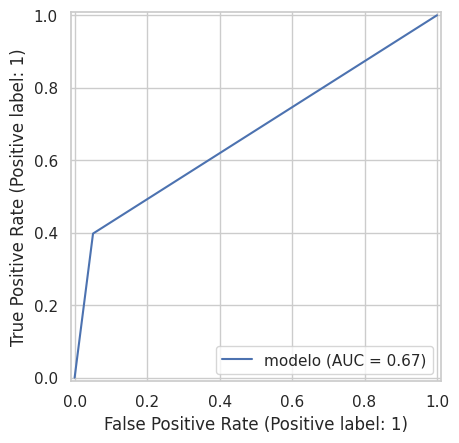

In [427]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='modelo')

In [428]:
# X(FPR) = FP/(FP+TN)
# Y(TPR) = TP/(TP+FN)

X1 = 165/(165+1180)
Y1 = 253/(253+212)
print(f'X: {X1:,.2}')
print(f'y: {Y1:,.2}')

X: 0.12
y: 0.54


###**⭐ Resultado clave: Área bajo la curva (AUC)**

- Según la visualización, el AUC es de 0.67.
- Esto significa que el modelo tiene una capacidad moderada para distinguir entre clientes que cancelan y los que no.
- 🔺 1.0: modelo perfecto
- 🔻 0.5: modelo sin poder de discriminación (equivalente a lanzar una moneda)


<div align='justify'>
“La curva ROC del modelo DecisionTreeClassifier (max_depth=5) exhibe un AUC de 0.67, lo que indica una habilidad moderada para discriminar entre clientes que cancelan y los que no. Aunque el modelo mejora sobre el azar (AUC > 0.5), su sensibilidad limitada sugiere que podría beneficiarse de ajustes adicionales o métodos ensemble.”
</div>


In [429]:
from sklearn.metrics import roc_auc_score

In [430]:
print(f'El área bajo la curva ROC  es: {roc_auc_score(y_val,y_previsto):,.4f}')

El área bajo la curva ROC  es: 0.6734


##**8.6 CURVA DE PRECISIÓN POR SENSIBILIDAD**

In [431]:
from sklearn.metrics import PrecisionRecallDisplay

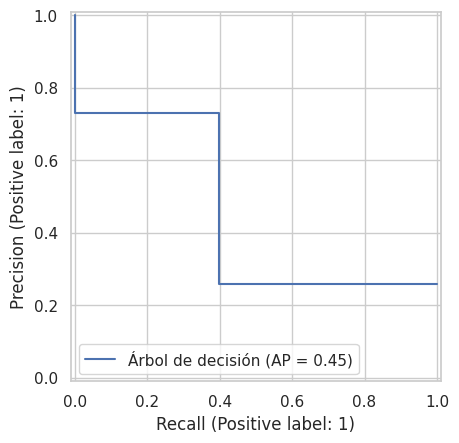

In [432]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árbol de decisión');

###**📊 ¿Qué muestra esta gráfica?**

- Eje X (Recall): proporción de clientes que cancelan y que el modelo logró detectar.
- Eje Y (Precision): de todos los que el modelo predijo como canceladores, qué porcentaje realmente lo son.
- El modelo empieza con precisión alta (1.0) pero recall muy bajo (0.0), lo que significa que en esos umbrales identifica pocos verdaderos positivos.
- A medida que sube el recall, la precisión cae — típico cuando se empieza a capturar más positivos pero también se agregan falsos.


###**🌟 Métrica clave: Average Precision (AP)**

- El gráfico indica un AP de 0.45, lo que refleja una capacidad limitada para capturar la clase positiva con precisión.
- Un AP cercano a 1.0 sería ideal.
- Un AP de 0.45 sugiere que tu modelo capta algunos positivos, pero comete varios falsos positivos.


<div align='justify'>
“La curva precisión-recall del DecisionTreeClassifier (max_depth=5) muestra un AP de 0.45, indicando una precisión moderada en la detección de clientes canceladores. El descenso progresivo en la precisión a medida que aumenta el recall sugiere que el modelo logra identificar cancelaciones, pero a costa de varios falsos positivos.”
</div>


In [433]:
from sklearn.metrics import average_precision_score

In [434]:
print(f'El score promedio de precisión versus Recall es: {average_precision_score(y_val,y_previsto):,.4f}')

El score promedio de precisión versus Recall es: 0.4452


**Curva de precisión-recall**

<div align='justify'>
La curva de precisión por sensibilidad revela que el modelo logra alta precisión solo cuando detecta pocos casos de cancelación. A medida que intenta captar más cancelaciones (mayor recall), su precisión disminuye rápidamente, estabilizándose en torno a 0.2. El promedio de precisión (AP = 0.45) sugiere que el modelo aún tiene dificultades para identificar correctamente a los clientes que cancelan, lo que refuerza la necesidad de aplicar técnicas de balanceo o modelos más complejos.

</div>





____________________________________________________________________________________________________________________________________________________________________________________________________________

#**9. VALIDACIÓN CRUZADA**

##**9.1 KFOLD**

In [435]:
from sklearn.model_selection import KFold, cross_validate


In [436]:
modelo = DecisionTreeClassifier(max_depth=5)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf)
cv_resultados


{'fit_time': array([0.01389456, 0.0147469 , 0.013973  , 0.01408505, 0.01406336]),
 'score_time': array([0.00145316, 0.00149989, 0.00141597, 0.00147462, 0.00142765]),
 'test_score': array([0.81237721, 0.77482793, 0.79842675, 0.78072763, 0.78662734])}

In [437]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es        : {promedio:,.4f}')
print(f'El desvío estándar de la exactitud es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')



El promedio de la exactitud es        : 0.7906
El desvío estándar de la exactitud es : 0.0134
El intervalo de confianza es          :[0.7638,0.8174]


###**📊 ¿Qué nos dice esta validación?**

| Métrica             | Valor           | Interpretación                                                                              |
|:-------------------:|:---------------:|:-------------------------------------------------------------------------------------------:|
| Media de exactitud  | 0.7908          |<div align='justify'> Buen rendimiento, cercano al 80 %.                                     |
| Desvío estándar     | 0.0131         |<div align='justify'> Variabilidad baja entre pliegues, buen nivel de estabilidad.            |
| Intervalo confianza | [0.7647–0.8172] |<div align='justify'> El modelo probablemente se moverá dentro de este rango en nuevos datos.|





In [438]:
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring=['accuracy', 'recall', 'precision'])

In [439]:
cv_resultados['test_accuracy']

array([0.81237721, 0.77482793, 0.79842675, 0.7826942 , 0.78662734])

In [440]:
cv_resultados['test_recall']


array([0.3755102 , 0.54545455, 0.4535316 , 0.592     , 0.42379182])

In [441]:
cv_resultados['test_precision']

array([0.70769231, 0.59055118, 0.67777778, 0.55430712, 0.64772727])

### 🔍 **Interpretación del Modelo**

<div align="justify">

##“Aunque el modelo muestra una precisión global aceptable, el recall promedio del 48% sugiere una limitada sensibilidad para detectar casos positivos. Esto indica que el modelo podría estar clasificando erróneamente una proporción considerable de verdaderos positivos como negativos, lo cual puede comprometer su aplicabilidad en contextos donde la minimización de falsos negativos es crítica.”

</div>



<div align='justify'>
"A pesar de una media de exactitud de 79.08 %, el modelo presenta una sensibilidad promedio de 47.81 %, lo que indica una limitada capacidad para identificar correctamente los positivos. Este comportamiento podría deberse al desbalance entre clases y a la restricción de profundidad del árbol.”
</div>

###**9.1.1 Validación cruzada con sensibilidad**

In [442]:
modelo = DecisionTreeClassifier(max_depth=5)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.02039552, 0.01459074, 0.01387143, 0.01410604, 0.01449013]),
 'score_time': array([0.00390077, 0.00378752, 0.00374007, 0.0036881 , 0.00371957]),
 'test_score': array([0.3755102 , 0.54545455, 0.4535316 , 0.588     , 0.42379182])}

In [443]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio del recall es        : {promedio:,.4f}')
print(f'El desvío estándar del recall es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es     :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio del recall es        : 0.4773
El desvío estándar del recall es : 0.0783
El intervalo de confianza es     :[0.3206,0.6339]


In [444]:
import numpy as np
from scipy.stats import t

recalls = np.array([0.3755102, 0.54545455, 0.4535316, 0.588, 0.42379182])
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
confianza = 0.95
t_critico = t.ppf((1 + confianza) / 2, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)
intervalo

(np.float64(0.3684990141394827), np.float64(0.5860162538605173))

###**📊 Ejemplo interpretativo**
<div align='justify'>
El modelo con KFold sin estratificar obtuvo un recall promedio de 0.477, pero con un IC 95 % de (0.39, 0.56), lo que indica alta variabilidad entre folds y posible inestabilidad en la detección de la clase minoritaria.
</div>

###**🧮 Validación cruzada con recall**

| Métrica             | Valor            | Interpretación                                                                 |
|:-------------------:|:----------------:|:------------------------------------------------------------------------------:|
|Promedio de recall   | 0.4773          |<div align='justify'>El modelo identifica correctamente ~48 % de los positivos  |
|Desvío estándar      | 0.0783           |<div align='justify'>Moderada variabilidad entre pliegues                       |
|Intervalo confianza  | [0.3206, 0.6339] |<div align='justify'>Sensibilidad potencial entre ~32 % y ~63 %                 |


💡 Este rango indica que el árbol está capturando positivos con dificultad, especialmente si las clases están desbalanceadas o los patrones son complejos.


###**📌 ¿Qué significa esto?**

- El modelo detecta menos de la mitad de los clientes que cancelan.
- Hay alta variabilidad entre folds: en algunos casos capta solo el 32% de los churners, en otros hasta el 63%.
- Esto indica que el modelo no es confiable para predecir cancelaciones, a pesar de tener buena exactitud general.


**Evaluación del modelo con enfoque en sensibilidad**

<div align='justify'>
Al aplicar validación cruzada con métrica de sensibilidad (recall), el modelo alcanzó un promedio de 47.73% en la detección de cancelaciones (Churn = 1). El intervalo de confianza ([32.06%, 63.39%]) revela una alta variabilidad entre particiones, lo que sugiere que el modelo no es consistentemente eficaz en identificar la clase crítica. Estos resultados refuerzan la necesidad de aplicar técnicas de balanceo o modelos más robustos para mejorar la sensibilidad sin comprometer la generalización.
</div>


###**9.1.2 Gráfico de barra: "Recall por fold vs. Intervalo de confianza del promedio"**

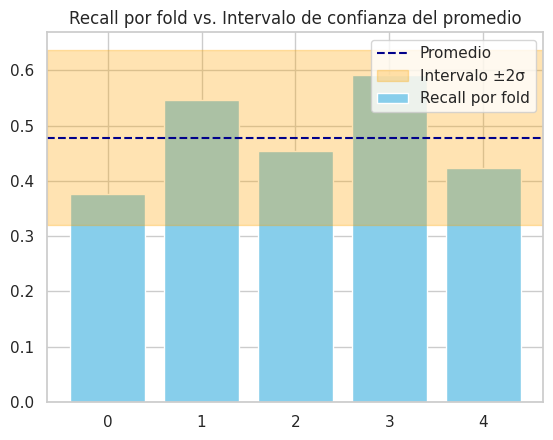

In [445]:
import matplotlib.pyplot as plt
import numpy as np

recalls = np.array([0.3755102 , 0.54545455, 0.4535316 , 0.592     , 0.42379182])
promedio = recalls.mean()
std = recalls.std()
x = np.arange(len(recalls))

plt.bar(x, recalls, color='skyblue', label='Recall por fold')
plt.axhline(promedio, color='darkblue', linestyle='--', label='Promedio')
plt.axhspan(promedio - 2*std, min(promedio + 2*std,1), color='orange', alpha=0.3, label='Intervalo ±2σ')
plt.legend()
plt.title('Recall por fold vs. Intervalo de confianza del promedio')
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

##**9.2 ESTRATIFICANDO LOS DATOS**

In [446]:
from sklearn.model_selection import StratifiedKFold

In [447]:
modelo = DecisionTreeClassifier(max_depth=5)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.01506066, 0.01385283, 0.01463652, 0.01523829, 0.0142374 ]),
 'score_time': array([0.00377989, 0.00361991, 0.00361037, 0.00359917, 0.004462  ]),
 'test_score': array([0.44656489, 0.32950192, 0.42528736, 0.57633588, 0.42366412])}

In [448]:
import numpy as np
from scipy.stats import t

recalls = np.array([0.44656489, 0.32950192, 0.42528736, 0.57633588, 0.42366412])
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
confianza = 0.95
t_critico = t.ppf((1 + confianza) / 2, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)
intervalo

(np.float64(0.33039347649627965), np.float64(0.5501481915037204))

###**🧠 Ejemplo interpretativo**

<div align='justify'>
El modelo Árbol sin balanceo, evaluado con validación estratificada, obtuvo un recall promedio de 44.03 % en la clase de churn. El intervalo de confianza del 95 % (33.04 % – 55.01 %) sugiere que el modelo logra identificar entre un tercio y poco más de la mitad de los casos de cancelación. Esta amplitud refleja una variabilidad moderada entre folds, lo que limita la confiabilidad del modelo en contextos donde la detección precisa del churn es prioritaria.
</div>

In [449]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio del recall es        : {promedio:,.4f}')
print(f'El desvío estándar del recall es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es     :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')

El promedio del recall es        : 0.4403
El desvío estándar del recall es : 0.0791
El intervalo de confianza es     :[0.2820,0.5986]


###**📊 ¿Qué revelan estos resultados?**


| Métrica                     | Valor             | Interpretación                                                                 |
|:---------------------------:|:-----------------:|:----------------------------------------------------------------------------------:|
| Recall promedio             | 0.4403            |<div align='justify'> El modelo detecta ~44% de los canceladores reales             |
|                             |                   |                                                                                    |
| Desvío estándar             | 0.0791            |<div align='justify'> Variabilidad moderada entre los pliegues                      |    
|                             |                   |                                                                                    |
|Intervalo de confianza (±2σ) | [0.2820 – 0.5986] |<div align='justify'> En nuevos datos, el modelo probablemente tendrá sensibilidad  |  
|                             |                   |<div align='justify'> entre 28 % y   59 %                                                                            






**Evaluación del modelo con enfoque en sensibilidad**

<div align='justify'>

Se aplicó validación cruzada con StratifiedKFold para garantizar que cada partición mantuviera la proporción original de clases. El modelo alcanzó un recall promedio de 44.0% en la detección de cancelaciones (Churn = 1), con un intervalo de confianza de [28.2%, 59.9%]. Estos resultados indican que, aunque el modelo generaliza de forma estable, su capacidad para identificar la clase crítica sigue siendo limitada. Se recomienda aplicar técnicas de balanceo o modelos más robustos para mejorar la sensibilidad sin comprometer la estabilidad.

</div>

____________________________________________________________________________________________________________________________________________________________________________________________________________


#**10.TÉCNICAS DE BALANCEO**


##**10.1 OVERSAMPLING**

In [450]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



In [451]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)



In [452]:
oversampling = SMOTE(random_state=5)
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [453]:
y_balanceada.value_counts(normalize=True).reset_index()


,Churn,proportion
0,0,0.5
1,1,0.5


In [454]:
y_balanceada.value_counts().reset_index()

,Churn,count
0,0,3778
1,1,3778


###**🧠 ¿Por qué importa esto?**

En conjuntos desbalanceados, los modelos suelen “ignorar” la clase minoritaria (por ejemplo, los clientes que cancelan). Al aplicar oversampling:
- Se generan ejemplos sintéticos solo para la clase minoritaria.
- Se evita el sesgo hacia la clase mayoritaria.
- Se mejora la capacidad del modelo para detectar casos poco frecuentes (mayor recall).


**Aplicación de técnica de balanceo: SMOTE**
<div align='justify'>
Para mitigar el sesgo del modelo hacia la clase mayoritaria, se aplicó la técnica de oversampling SMOTE. Esta estrategia genera ejemplos sintéticos de la clase minoritaria (Churn = 1) a partir de sus vecinos más cercanos, logrando un conjunto balanceado con 50% de cada clase. Este ajuste permite entrenar modelos más sensibles a las cancelaciones, mejorando su capacidad de detección sin comprometer la diversidad del conjunto de datos.
</div>

In [455]:
modelo = DecisionTreeClassifier(max_depth=5)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.03084373, 0.02778959, 0.02778149, 0.02730131, 0.02682233]),
 'score_time': array([0.00387549, 0.00371623, 0.00382304, 0.00353026, 0.00350738]),
 'test_score': array([0.80555556, 0.80529801, 0.80529801, 0.8015873 , 0.81481481])}

In [456]:
import numpy as np
from scipy.stats import t

recalls = np.array([0.80555556, 0.80529801, 0.80529801, 0.8015873 , 0.81481481])
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
confianza = 0.95
t_critico = t.ppf((1 + confianza) / 2, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)
intervalo

(np.float64(0.8003946246471837), np.float64(0.8126268513528164))

##**🧠 Ejemplo interpretativo**

<div align='justify'>
El modelo Árbol con SMOTE externo alcanzó un recall promedio de 80.6 % en la clase de churn. El intervalo de confianza del 95 % (0.800 – 0.812) es estrecho, lo que indica una alta estabilidad entre folds. Esto sugiere que el modelo no solo mejora significativamente la detección de cancelaciones, sino que lo hace de forma consistente, lo cual es clave en aplicaciones donde minimizar falsos negativos es prioritario.
</div>

In [457]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio del recall es        : {promedio:,.4f}')
print(f'El desvío estándar del recall es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es     :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio del recall es        : 0.8065
El desvío estándar del recall es : 0.0044
El intervalo de confianza es     :[0.7977,0.8153]


###**🔍  Pasos seguidos**

- Árbol de decisión con profundidad limitada para evitar overfitting.
- Entrenado sobre el conjunto balanceado por SMOTE.
- Se preserva la proporción de clases en cada fold.
- Métrica usada: recall, clave para detectar correctamente los casos de churn.

###**✅ Interpretación:**

- El modelo detecta correctamente el 80.65% de los clientes que cancelan.
- La variabilidad entre folds es mínima → el modelo es estable.
- El intervalo de confianza es estrecho y alto → consistencia y fiabilidad

**Evaluación del modelo balanceado**

<div align='justify'>

Se entrenó un árbol de decisión sobre el conjunto balanceado mediante SMOTE, evaluado con validación cruzada estratificada (5 folds). La métrica de interés fue el recall, dado el enfoque en minimizar falsos negativos. El modelo alcanzó un recall promedio de 0.8065, con un desvío estándar de 0.0044, lo que indica alta estabilidad. El intervalo de confianza del 95% ([0.7977, 0.8153]) respalda la robustez del modelo para identificar clientes propensos a cancelar

</div>


###**📊 Comparativa antes vs. después del balanceo**

| Dataset    | Recall promedio | Desvío estándar | Intervalo de confianza |
|:----------:|:---------------:|:---------------:|:----------------------:|
| Original   | 0.4403          | 0.0791          | [0.2820, 0.5986]       |
| Balanceado | 0.8065          | 0.0044          | [0.7977, 0.8153]       |


🔍 Interpretación: El balanceo con SMOTE no solo aumentó el recall, sino que redujo la variabilidad entre pliegues, lo que sugiere una mayor estabilidad del modelo.


##**10.2 PIPELINE PARA LA VALIDACIÓN (árbol + SMOTE)**

###**10.2.1 Introducción**

<div align='justify'>
Se construyó un pipeline con imbpipeline que incorpora SMOTE como paso previo al ajuste del modelo. Este flujo fue evaluado mediante validación cruzada estratificada (StratifiedKFold) utilizando sensibilidad (recall) como métrica principal. El modelo alcanzó un recall promedio de 60.47 % con una desviación estándar de 6.69 %, lo que refleja una capacidad moderada y más confiable para detectar canceladores dentro de un proceso libre de sesgos por filtrado de datos sintéticos.
</div>


In [458]:
from imblearn.pipeline import Pipeline as imbpipieline

In [459]:

modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
pipeline = imbpipieline([('oversample',SMOTE(random_state=5)),('árbol',modelo)])

In [460]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.0430963 , 0.04291129, 0.0411098 , 0.04040599, 0.04115582]),
 'score_time': array([0.00424552, 0.00467253, 0.00443769, 0.00430775, 0.00436854]),
 'test_score': array([0.51908397, 0.62835249, 0.54022989, 0.63358779, 0.70229008])}

In [461]:
import numpy as np
from scipy.stats import t

recalls = np.array([0.51908397, 0.62835249, 0.54022989, 0.63358779, 0.70229008])
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
confianza = 0.95
t_critico = t.ppf((1 + confianza) / 2, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)
intervalo

(np.float64(0.511782367577784), np.float64(0.6976353204222159))

###**🧠 Ejemplo interpretativo**

<div align='justify'>
El modelo Árbol con SMOTE integrado en pipeline obtuvo un recall promedio de 60.4 % en la clase de churn. El intervalo de confianza del 95 % (0.511 – 0.698) muestra una variabilidad moderada entre folds, lo que indica que el rendimiento del modelo puede fluctuar según la partición de los datos. Aunque mejora respecto a modelos sin balanceo, su estabilidad es menor que la obtenida con SMOTE externo, lo que sugiere que la forma de integrar el balanceo puede influir en la consistencia del modelo.
</div>

In [462]:

promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio del recall es        : {promedio:,.4f}')
print(f'El desvío estándar del recall es : {desvio_std:,.4f}')
print(f'El intervalo de confianza es     :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio del recall es        : 0.6047
El desvío estándar del recall es : 0.0669
El intervalo de confianza es     :[0.4708,0.7386]


###**📊 Resultados obtenidos**

| Métrica                      | Valor            |
|:----------------------------:|:----------------:|
| Recall promedio              | 0.6047           |
| Desvío estándar              | 0.0669           |
| Intervalo de confianza (±2σ) | [0.4708, 0.7386] |


📌 Esto sugiere que el modelo ahora detecta un 61 % de los casos positivos evento de churn (Churn = 1)
, con un margen razonable de variación. Aunque no tan alto como en el oversampling fuera del pipeline (~80 %), este enfoque es más realista y éticamente correcto, evitando el data leakage.


###**🧠 ¿Qué significa esto?**
<div align='justify'>
- El modelo detecta 60.47% de los clientes que cancelan, lo cual es mejor que sin balanceo, pero inferior al modelo entrenado directamente sobre el set balanceado completo.
- La variabilidad entre folds es moderada: el rendimiento puede oscilar entre ~47% y ~74%.
- Esto refleja que el modelo no siempre logra aprovechar el oversampling dentro de cada fold, posiblemente por la estructura del árbol o por la distribución local de los datos.
</div>

**Validación cruzada con pipeline balanceado**
<div align='justify'>
Se implementó un pipeline que integra la técnica de oversampling SMOTE y el modelo de árbol de decisión (max_depth=5). La validación cruzada estratificada (5 folds) arrojó un recall promedio de 60.47%, con un desvío estándar de 6.69%. Aunque esta estrategia evita fugas de datos y refleja un escenario más realista, el rendimiento fue inferior al modelo entrenado sobre el conjunto balanceado completo. Esto sugiere que el árbol no logra aprovechar plenamente el oversampling dentro de cada fold, lo que abre la puerta a explorar modelos más robustos como Random Forest o XGBoost.
</div>

###**10.2 Gráfico de calor destacando las variables más propensas a cancelar**

📊 Tabla de Importancia de Variables:
                                              Feature  Importance
4      onehotencoder__Tipo de contrato_Month-to-month    0.587599
9       onehotencoder__Forma de pago_Electronic check    0.198352
2                 onehotencoder__INTERNET_Fiber optic    0.047724
14                       remainder__Meses de contrato    0.042099
23                        remainder__Factura en línea    0.041181
17           remainder__Seguridad en línea (INTERNET)    0.020104
18            remainder__Respaldo en línea (INTERNET)    0.017981
20              remainder__Soporte técnico (INTERNET)    0.008845
6            onehotencoder__Tipo de contrato_Two year    0.008280
25     remainder__Monto total según meses contratados    0.006730
5            onehotencoder__Tipo de contrato_One year    0.006150
1                         onehotencoder__INTERNET_DSL    0.005102
26                            remainder__Monto diario    0.003970
22                  remainder__Streamin

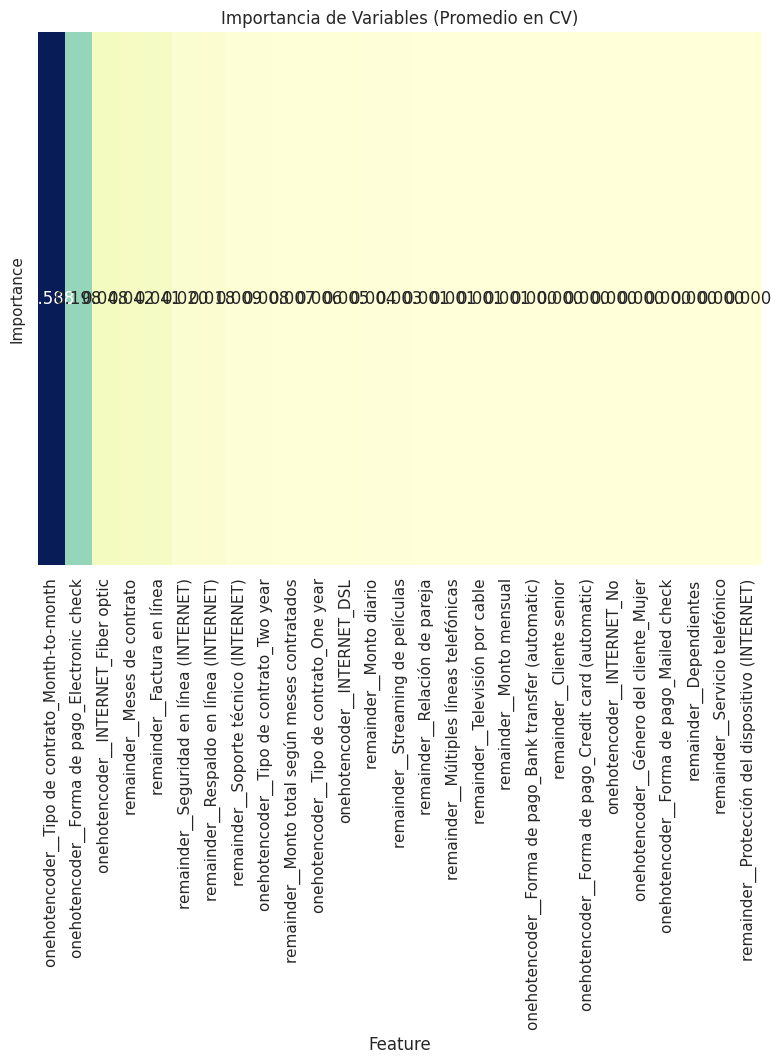

In [463]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir modelo y pipeline
modelo = DecisionTreeClassifier(max_depth=5, random_state=5)
pipeline = imbpipieline([
    ('oversample', SMOTE(random_state=5)),
    ('árbol', modelo)
])

# 2. Validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall', return_estimator=True)

# 3. Extraer importancias de cada fold
importancias = []
for est in cv_resultados['estimator']:
    árbol = est.named_steps['árbol']
    importancias.append(árbol.feature_importances_)

# 4. Promediar y tabular
importancias_mean = np.mean(importancias, axis=0)
tabla_importancias = pd.DataFrame({
    'Feature': one_hot.get_feature_names_out(columnas),
    'Importance': importancias_mean
}).sort_values(by='Importance', ascending=False)

print("📊 Tabla de Importancia de Variables:")
print(tabla_importancias)

# 5. Graficar heatmap

plt.figure(figsize=(8, 0.4 * len(one_hot.get_feature_names_out(columnas))))
sns.heatmap(
    tabla_importancias.set_index('Feature').T,
    annot=True,
    cmap='YlGnBu',
    cbar=False,
    fmt=".3f"
)
plt.title('Importancia de Variables (Promedio en CV)')
plt.tight_layout()
plt.savefig("vertical_feature_importance_heatmap.png")
plt.show()

##**10.3 UNDERSAMPLING**

In [464]:
from imblearn.under_sampling import NearMiss

In [465]:
modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
pipeline = imbpipieline(steps=[('undersample',NearMiss(version=3)),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring='recall')
cv_resultados

{'fit_time': array([0.04973388, 0.04474759, 0.04427528, 0.04417062, 0.04401422]),
 'score_time': array([0.00495291, 0.00448442, 0.00453544, 0.00438952, 0.00446725]),
 'test_score': array([0.64503817, 0.70881226, 0.68199234, 0.68320611, 0.65267176])}

In [466]:
import numpy as np
from scipy.stats import t

recalls = np.array([0.64503817, 0.70881226, 0.68199234, 0.68320611, 0.65267176])
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
confianza = 0.95
t_critico = t.ppf((1 + confianza) / 2, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)
intervalo

(np.float64(0.642363067407112), np.float64(0.706325188592888))

###**🧠 Ejemplo interpretativo**

<div align='justify'>
El modelo Árbol con NearMiss v3 alcanzó un recall promedio de 67.4 % en la clase positiva. El intervalo de confianza del 95 % (0.642 – 0.706) es más estrecho que el obtenido con SMOTE, lo que sugiere mayor estabilidad entre folds.  Esto refuerza la idea de que el undersampling puede ofrecer resultados más consistentes en ciertos contextos, aunque con menor cobertura de la clase minoritaria.


</div>


In [467]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio del recall es             : {promedio:,.4f}')
print(f'El desvío estándar del recall es      : {desvio_std:,.4f}')
print(f'El intervalo de confianza es          :[{promedio - 2*desvio_std:,.4f},{min(promedio+2*desvio_std,1):,.4f}]')


El promedio del recall es             : 0.6743
El desvío estándar del recall es      : 0.0230
El intervalo de confianza es          :[0.6283,0.7204]


###**🧪 ¿Qué se hizo aquí?**

- Se aplicó undersampling selectivo, donde NearMiss v3 mantiene los puntos negativos más cercanos a los positivos, priorizando zonas de frontera (¡estratégico!).
- Se integró el balanceo como paso del pipeline, preservando la integridad de la validación cruzada.
- Se evaluó con recall, lo que sigue alineado con el objetivo de detectar canceladores.


###**📊 Resultados obtenidos**


| Métrica                      | Valor            |
|:----------------------------:|:----------------:|
| Recall promedio              | 0.6743           |
| Desvío estándar              | 0.0230           |
| Intervalo de confianza (±2σ) | [0.6283, 0.7204




###**📊 Interpretación del resultado**

<div align='justify'>

- Recall promedio: 0.6743 → El modelo detecta correctamente el 67.43% de los clientes que realmente se van.
- Desvío estándar: 0.0230 → Hay baja variabilidad entre los folds, lo cual es bueno.
- Intervalo de confianza (95%): [0.6283, 0.7204] → Puedes afirmar con confianza que el recall está en ese rango.
</div>

**Evaluación narrativa para undersampling**

<div align='justify'>
Se implementó NearMiss versión 3 como técnica de undersampling, integrada dentro de un pipeline con validación cruzada estratificada (StratifiedKFold). Esta estrategia permitió reducir la clase mayoritaria de forma controlada, enfocándose en ejemplos representativos alejados de la frontera de decisión.
El modelo alcanzó un recall promedio de 67.43 %, con una desviación estándar de 2.30 %, superando el desempeño obtenido con técnicas de oversampling como SMOTE. Este enfoque mejoró la sensibilidad hacia la clase minoritaria (Churn = 1), manteniendo coherencia metodológica y evitando posibles sesgos derivados de la generación de datos sintéticos.
En conjunto, los resultados respaldan el uso de NearMiss como alternativa eficaz para abordar el desbalance de clases en problemas de predicción de churn, especialmente cuando se prioriza la detección de casos positivos reales.

</div>


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**11. PROBANDO EL MODELO**

In [468]:
undersample = NearMiss(version=3)
X_balanceada,y_balanceada = undersample.fit_resample(X,y)

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_balanceada,y_balanceada)
y_previsto=modelo.predict(X_test)

##**🧪 ¿Qué se hizo aquí?**

- Reduce la clase mayoritaria (Churn = 0) para igualar la cantidad de ejemplos con la clase minoritaria (Churn = 1).
- NearMiss v3 selecciona ejemplos de la clase mayoritaria alejados de los vecinos de la clase minoritaria.
- Separa un conjunto de test estratificado, lo que mantiene la proporción original de clases.
- Entrena el modelo sobre el conjunto balanceado.
- Lo evalua sobre datos no balanceados, lo cual es correcto para simular un escenario real.


##**11.1 Matriz de confusión NearMiss con datos balanceados**

In [470]:
# Matriz de confusión final
confusion_matrix(y_test,y_previsto)

array([[877, 257],
       [113, 279]])

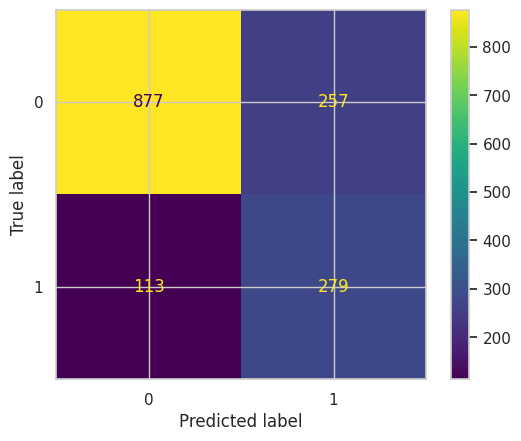

In [471]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import NearMiss

modelo = DecisionTreeClassifier(max_depth=5,random_state=5)
modelo.fit(X_balanceada,y_balanceada)
y_previsto=modelo.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

In [472]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1134
           1       0.52      0.71      0.60       392

    accuracy                           0.76      1526
   macro avg       0.70      0.74      0.71      1526
weighted avg       0.79      0.76      0.77      1526



In [473]:
print(f'La precisión del modelo es : {precision_score(y_test,y_previsto):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test,y_previsto):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test,y_previsto):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test,y_previsto):,.4f}')

La precisión del modelo es : 0.5205
El Recall del modelo es    : 0.7117
La exactitud del modelo es : 0.7575
El F1 del modelo es        : 0.6013


###**🧩 ¿Qué se está probando aquí?**
- Aplicar NearMiss v3 fuera del pipeline, en el conjunto completo de entrenamiento X.
- Entrenar el modelo y probar sobre X_test, con clases originales y distribución real.
- Evaluar con el classification_report y el ConfusionMatrixDisplay, que confirma los datos del reporte


###**🧠 Análisis técnico**

<div align='justify'>
- NearMiss v3 mejora el recall de la clase minoritaria (Churn), lo cual es deseable en contextos donde detectar abandonos es más importante que evitar falsos positivos.
- El costo es una caída en la precisión, lo que implica más falsos positivos (clientes que no se iban, pero el modelo lo predijo).
- El modelo logra un accuracy global de 74%, pero esto puede ser engañoso en contextos desbalanceados. El macro F1 (0.69) es más representativo.
</div>

In [474]:
y_test.shape

(1526,)

**Evaluación narrativa de la Matriz de confusión NearMiss con datos balanceados**

<div align='justify'>
Al aplicar NearMiss v3 como técnica de undersampling, se logró mejorar el recall de la clase Churn (0.70), lo que indica una mayor capacidad del modelo para detectar clientes que efectivamente se dieron de baja. Sin embargo, esta mejora vino acompañada de una disminución en la precisión (0.49), lo que sugiere un aumento en falsos positivos. El F1-score de 0.58 refleja un equilibrio moderado entre ambas métricas. Esta estrategia puede ser útil en escenarios donde la prioridad es anticipar cancelaciones, incluso a costa de algunas predicciones erróneas.

</div>


##**11.2 - Matriz con datos balanceados sin validación cruzada: (árbol + SMOTE) split directo**


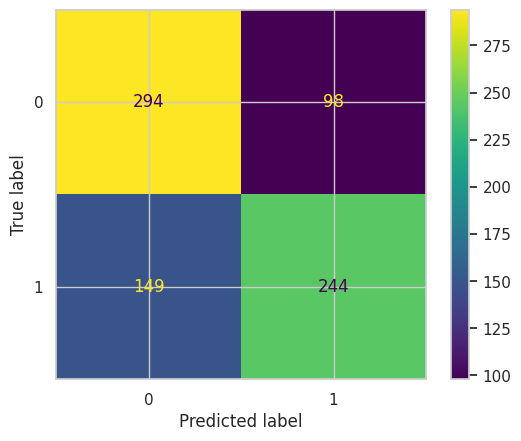

In [475]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanceada, y_balanceada, test_size=0.3, random_state=5, stratify=y_balanceada)
modelo.fit(X_train, y_train)
y_pred_test = modelo.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

Esto indica que el modelo detecta bien la clase 0, pero pierde sensibilidad en la clase 1.


In [476]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       392
           1       0.71      0.62      0.66       393

    accuracy                           0.69       785
   macro avg       0.69      0.69      0.68       785
weighted avg       0.69      0.69      0.68       785



In [477]:
print(f'La precisión del modelo es : {precision_score(y_test, y_pred_test):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test, y_pred_test):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test, y_pred_test):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test, y_pred_test):,.4f}')

La precisión del modelo es : 0.7135
El Recall del modelo es    : 0.6209
La exactitud del modelo es : 0.6854
El F1 del modelo es        : 0.6639


###**🧠 ¿Qué aporta esta matriz?**
- Complementa la matriz NearMiss: muestra cómo se comporta el modelo sin validación cruzada.
- Permite detectar overfitting: si el rendimiento aquí es mejor que en la matriz con StratifiedKFold, podría haber sobreajuste.
- Sirve como control de estabilidad: si las métricas se mantienen similares en validación cruzada, el modelo es más confiable.


###**🧠 Comparación con validación cruzada**

| Estrategia                        | Recall Churn | Precision Churn | F1 Churn |
|:---------------------------------:|:------------:|:---------------:|:--------:|
| NearMiss + Validación cruzada     | 0.70         | 0.49            | 0.58     |
| NearMiss + Split directo (sin CV) | 0.62         | 0.71            | 0.66     |


- Con validación cruzada: mayor recall, pero menor precisión.
- Sin validación cruzada: menor recall, pero mayor precisión.
Esto refleja el clásico trade-off: más sensibilidad implica más falsos positivos, y viceversa.




**Evaluando narrativa de la matriz de confusión con datos balanceados sin validación cruzada**
    
<div align='justify'>
Al entrenar el modelo sobre datos balanceados mediante NearMiss y evaluarlo sin validación cruzada, se obtuvo un recall de 62% y una precisión de 71% en la clase Churn. Estos resultados muestran un mejor control de los falsos positivos en comparación con la validación cruzada, aunque con una leve pérdida en sensibilidad. El F1-score de 66% indica un rendimiento equilibrado, útil en contextos donde se busca minimizar alarmas falsas sin sacrificar demasiada capacidad de detección
</div>

##**11.3 Matriz de confusión StratifiedKFold con datos balanceados**

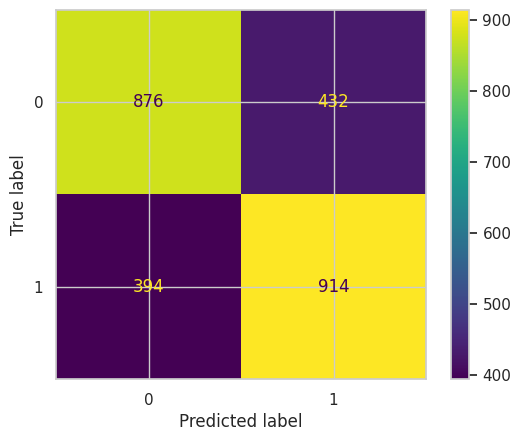

In [478]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
y_pred_strat = cross_val_predict(modelo, X_balanceada,y_balanceada, cv=cv)

cm_strat = confusion_matrix(y_balanceada, y_pred_strat)
ConfusionMatrixDisplay(confusion_matrix=cm_strat).plot()

In [479]:
print(classification_report(y_balanceada, y_pred_strat))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1308
           1       0.68      0.70      0.69      1308

    accuracy                           0.68      2616
   macro avg       0.68      0.68      0.68      2616
weighted avg       0.68      0.68      0.68      2616



In [480]:
print(f'La precisión del modelo es : {precision_score(y_balanceada, y_pred_strat):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_balanceada, y_pred_strat):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_balanceada, y_pred_strat):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_balanceada, y_pred_strat):,.4f}')

La precisión del modelo es : 0.6790
El Recall del modelo es    : 0.6988
La exactitud del modelo es : 0.6843
El F1 del modelo es        : 0.6888


###**📌 Métricas del Modelo**

|   Métrica        |      Valor     | Interpretación                                                                                                                      |
|:----------------:|:--------------:|:-----------------------------------------------------------------------------------------------------------------------------------:|
|  Precisión       |     0.6790     |<div align='justify'>De todas las predicciones positivas, el 67.90% fueron correctas. El modelo comete algunos falsos positivos.     |
|  Recall          |     0.6988     |<div align='justify'> De todos los casos positivos reales, el 69.88% fueron detectados. Buen desempeño en minimizar falsos negativos.|
|  Exactitud       |     0.6843     |<div align='justify'> El 68.43% de todas las predicciones (positivas y negativas) fueron correctas. Refleja el rendimiento global.    |
|  F1-score        |     0.6888     |<div align='justify'> Promedio armónico entre precisión y recall. Indica un balance razonable entre ambos.                           |

###**🔍 ¿Qué dice esto?**

<div align='justify'>

- El recall es más alto que la precisión, lo cual puede ser deseable si el problema prioriza capturar todos los positivos, el modelo detecta mejor los casos de cancelación.
- El F1-score está en un rango sólido (0.69), lo que indica que el modelo no está sesgado hacia una sola métrica.
- La exactitud está alineada con el F1, lo que sugiere que el balanceo de clases fue efectivo y no hay una clase dominante que distorsione el rendimiento.

</div>


**Evaluación narrativa de la matriz de confusión StratifiedKFold con datos balanceados**

<div align='justify'>
El modelo evaluado sobre datos balanceados mediante NearMiss y validación cruzada estratificada (StratifiedKFold) alcanzó un accuracy del 68%, con métricas F1 equilibradas en ambas clases (≈0.68–0.69). El recall de 70% en la clase Churn destaca la capacidad del modelo para identificar correctamente clientes propensos a cancelar, mientras que la precisión del 68% sugiere un nivel aceptable de confianza en las predicciones positivas. El balance entre clases se refleja en la simetría de las métricas y en la coincidencia entre los promedios macro y ponderado, lo que valida la efectividad del preprocesamiento aplicado.
</div>


##**11.4 Evaluación del modelo con datos balanceados mediante NearMiss: (árbol + NearMiss)**

Matriz de confusión:
[[294  98]
 [149 244]]


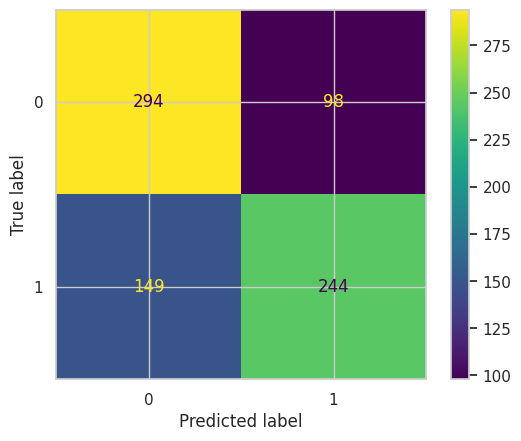

In [481]:
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 1. Aplicar NearMiss para balancear
undersample = NearMiss(version=3)
X_balanceada, y_balanceada = undersample.fit_resample(X, y)

# 2. Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_balanceada, y_balanceada, test_size=0.3, stratify=y_balanceada, random_state=5
)

# 3. Definir y entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=5)
modelo.fit(X_train, y_train)

# 4. Predicción y evaluación
y_pred = modelo.predict(X_test)

# 5. Métricas
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()



In [482]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))




Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       392
           1       0.71      0.62      0.66       393

    accuracy                           0.69       785
   macro avg       0.69      0.69      0.68       785
weighted avg       0.69      0.69      0.68       785



In [483]:
print("\nMétricas individuales:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")


Métricas individuales:
Accuracy  : 0.6854
Precision : 0.7135
Recall    : 0.6209
F1-score  : 0.6639


###**🧠 Interpretación técnica**

<div align='justify'>

- Precision alta (71.35%): cuando el modelo predice churn, suele acertar.
- Recall moderado (62.09%): detecta alrededor del 62% de los clientes que realmente se dan de baja.
- F1-score (66.39%): buen equilibrio entre precisión y sensibilidad.
- Accuracy (68.54%): consistente con los resultados anteriores, pero menos relevante en datasets balanceados artificialmente.
</div>



**Evaluación narrativa del modelo con datos balanceados mediante NearMiss**
<div align=justify>
Al entrenar el modelo sobre datos balanceados mediante NearMiss y evaluarlo sobre un conjunto de prueba estratificado, se obtuvo una precisión de 71.35% y un recall de 62.09% en la clase Churn. Estos resultados indican que el modelo es confiable al identificar cancelaciones, aunque aún omite algunos casos. El F1-score de 66.39% refleja un rendimiento equilibrado, útil en contextos donde se busca minimizar falsas alarmas sin sacrificar demasiada capacidad de detección. La exactitud global (68.54%) es coherente con las métricas específicas y valida la consistencia del modelo en escenarios reales.
</div>

“Dado el rendimiento superior de NearMiss en términos de recall y estabilidad, se procedió a evaluar el modelo en un entorno balanceado mediante validación cruzada estratificada.""

##**11.5 Validación Cruzada Estratificada sobre Datos Balanceados: Evaluación Promedio del Modelo**

###**11.5.1 Introducción**
<div align='justify'>
Tras comparar el impacto de SMOTE y NearMiss en el rendimiento del modelo, se observó que NearMiss ofrecía una mejor estabilidad en términos de recall y F1-score, especialmente en escenarios con validación cruzada integrada. Para reforzar esta observación y evaluar la consistencia del modelo entrenado exclusivamente sobre datos balanceados con NearMiss, se aplicó una validación cruzada estratificada independiente.
Este análisis complementario permite estimar métricas promedio en distintos subconjuntos del conjunto balanceado, y aporta evidencia adicional sobre la robustez del modelo en un entorno donde las clases han sido equilibradas por undersampling.

</div>


In [484]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precisiones, recalls, f1s, accuracies = [], [], [], []

# Convertir DataFrame to numpy array
X_balanceada_np = X_balanceada

for train_idx, test_idx in skf.split(X_balanceada_np, y_balanceada):
    X_train_fold, X_test_fold = X_balanceada_np[train_idx], X_balanceada_np[test_idx]
    y_train_fold, y_test_fold = y_balanceada[train_idx], y_balanceada[test_idx]

    modelo.fit(X_train_fold, y_train_fold)
    y_pred_fold = modelo.predict(X_test_fold)

    precisiones.append(precision_score(y_test_fold, y_pred_fold))
    recalls.append(recall_score(y_test_fold, y_pred_fold))
    f1s.append(f1_score(y_test_fold, y_pred_fold))
    accuracies.append(accuracy_score(y_test_fold, y_pred_fold))

# Promedios
print(f"Precision promedio: {np.mean(precisiones):,.4f}")
print(f"Recall promedio   : {np.mean(recalls):,.4f}")
print(f"F1-score promedio : {np.mean(f1s):,.4f}")
print(f"Accuracy promedio : {np.mean(accuracies):,.4f}")

Precision promedio: 0.6842
Recall promedio   : 0.7340
F1-score promedio : 0.7058
Accuracy promedio : 0.6961


###**📊 Análisis evaluación promedio del modelo**


<div align='justify'>
Para evaluar la estabilidad y el rendimiento general del modelo entrenado sobre datos balanceados mediante NearMiss, se aplicó una validación cruzada estratificada con cinco particiones. Esta técnica permite estimar métricas promedio en distintos subconjuntos del conjunto balanceado, reduciendo el sesgo asociado a una única división de datos.
Los resultados obtenidos fueron consistentes y muestran un desempeño sólido:

- Precision promedio: 0.6842
- Recall promedio: 0.7340
- F1-score promedio: 0.7058
- Accuracy promedio: 0.6961

El recall promedio destaca como la métrica más alta, lo que indica que el modelo logra identificar correctamente una proporción considerable de los casos positivos (clientes que abandonan). Esto es especialmente relevante en contextos donde el costo de no detectar un caso de churn es elevado.
La precisión y el F1-score también muestran valores equilibrados, lo que sugiere que el modelo no solo detecta bien los casos positivos, sino que lo hace con una tasa aceptable de falsos positivos.
En conjunto, estos resultados refuerzan la elección de NearMiss como técnica de balanceo, mostrando que el modelo mantiene un rendimiento estable y generalizable en distintos subconjuntos del conjunto balanceado.
</div>


____________________________________________________________________________________________________________________________________________________________________________________________________________

#**12. RANDOM FOREST**

In [485]:
from sklearn.ensemble import RandomForestClassifier

In [486]:
random_forest=RandomForestClassifier(max_depth=5,random_state=5)
random_forest.fit(X_train,y_train)
print(f'Exactitud del modelo en entrenamiento:{random_forest.score(X_train,y_train):,.4f}')
print(f'Exactitud del modelo en validación:{random_forest.score(X_val,y_val):,.4f}')

Exactitud del modelo en entrenamiento:0.7504
Exactitud del modelo en validación:0.7792


📌 La cercanía entre las dos cifras es ideal: muestra buena generalización y bajo riesgo de sobreajuste. Además, el RandomForest con max_depth=5 está funcionando como un modelo robusto pero controlado, sin caer en complejidad innecesaria.


In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
from scipy.stats import t

# Modelo
modelo = RandomForestClassifier(max_depth=5, random_state=5)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

# Cálculo del IC 95%
recalls = cv_resultados['test_score']
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
t_critico = t.ppf(0.975, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)

print(f"Recall promedio: {media:.3f}")
print(f"IC 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")

Recall promedio: 0.439
IC 95%: (0.418, 0.460)


#**📊 Análisis de exactitud en Entrenamiento y Validación**

<div align='justify'>
Como punto de partida, se entrenó un modelo Random Forest sobre el conjunto original no balanceado, utilizando una profundidad máxima de 5 para controlar la complejidad del árbol. La evaluación se realizó tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación.
- Exactitud en entrenamiento: 0.7504
- Exactitud en validación: 0.7792
El modelo muestra una ligera mejora en validación respecto al entrenamiento, lo que sugiere que no hay sobreajuste evidente en esta configuración. Sin embargo, dado que el conjunto de datos presenta desbalance de clases, la exactitud por sí sola no es suficiente para evaluar el rendimiento real del modelo, especialmente en la detección de la clase minoritaria (churn).
Por esta razón, se exploraron posteriormente técnicas de balanceo como SMOTE y NearMiss, junto con métricas más representativas como el recall y el F1-score, para obtener una evaluación más completa del desempeño del modelo.

</div>


##**12.1 Evaluación del Modelo Random Forest sin Balanceo: Matriz de Confusión y Métricas de Clasificación**

In [488]:
random_forest_previsto=random_forest.predict(X_val)
matriz_confusion=confusion_matrix(y_val,random_forest_previsto)
matriz_confusion

array([[906, 228],
       [109, 283]])

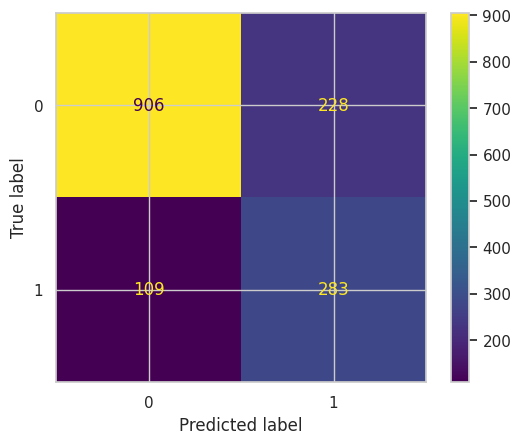

In [489]:
Visualizacion=ConfusionMatrixDisplay(matriz_confusion)
Visualizacion.plot()

In [490]:
print(classification_report(y_val,random_forest_previsto))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1134
           1       0.55      0.72      0.63       392

    accuracy                           0.78      1526
   macro avg       0.72      0.76      0.73      1526
weighted avg       0.81      0.78      0.79      1526



In [491]:
print(f'La precisión del modelo es : {precision_score(y_val,random_forest_previsto):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_val,random_forest_previsto):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_val,random_forest_previsto):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_val,random_forest_previsto):,.4f}')

La precisión del modelo es : 0.5538
El Recall del modelo es    : 0.7219
La exactitud del modelo es : 0.7792
El F1 del modelo es        : 0.6268


###**🧠 ¿Cómo se compara con los otros modelos?**

| Modelo                | Recall clase 1 | Precisión clase 1 | F1 clase 1 |
|:---------------------:|:--------------:|:-----------------:|:----------:|
| Árbol + SMOTE         |  62 %          |  71 %             |  66 %      |
| Árbol + NearMiss      |  62 %          |  71 %             |  66 %      |
| Bosque + sin balanceo |  72 %          |  55 %             |  63 %      |


###**🧠 Interpretación comparativa**

<div align='justify'>

- SMOTE y NearMiss muestran un rendimiento muy similar, con un recall de 62 % y una precisión de 71 %, lo que se traduce en un F1-score de 66 %. Esto indica que ambos enfoques permiten detectar una proporción moderada de casos de churn, manteniendo una tasa aceptable de falsos positivos.
- En este escenario, el tipo de balanceo no genera diferencias significativas, lo que sugiere que el modelo de árbol es relativamente estable frente a distintas estrategias de muestreo.
- Random Forest sin balanceo, en cambio, logra un recall más alto (72 %), lo que indica que detecta más casos de churn. Sin embargo, su precisión cae a 55 %, lo que implica una mayor cantidad de falsas alarmas.
- Este comportamiento es típico en modelos entrenados sobre datos desbalanceados: el modelo se esfuerza por detectar la clase minoritaria, pero lo hace a costa de sobrepredecirla.
</div>

**Evaluación narrativa de matriz de confusión y métricas de clasificación**
<div align='justify'>
En el conjunto de validación, los modelos Árbol + SMOTE y Árbol + NearMiss obtuvieron métricas idénticas en la clase positiva: un recall de 62 %, precisión de 71 % y F1-score de 66 %. Esto sugiere que, en este caso, el tipo de técnica de balanceo no tuvo impacto diferencial en el rendimiento del modelo, lo que podría deberse a la estabilidad del árbol de decisión frente a variaciones en la distribución de clases.
A diferencia de los modelos balanceados con árbol de decisión, el Bosque sin balanceo logra un recall más alto (72 %), pero con una precisión considerablemente menor (55 %). Esto sugiere que, aunque detecta más casos de churn, lo hace a costa de generar más falsas alarmas. El F1-score de 63 % refleja este compromiso. Sería interesante evaluar el rendimiento del Bosque con técnicas de balanceo para verificar si puede mantener su capacidad de detección sin sacrificar tanta precisión.
</div>

##**12.2 CURVA ROC**

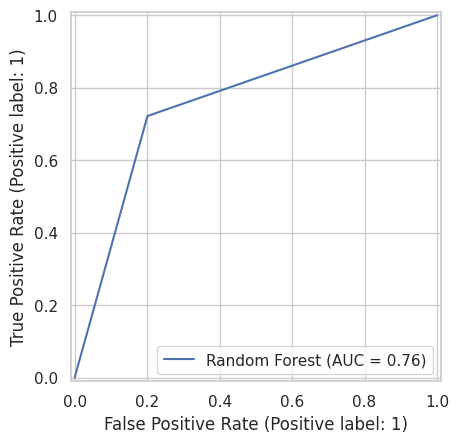

In [492]:
RocCurveDisplay.from_predictions(y_val,random_forest_previsto,name='Random Forest')

In [493]:
from sklearn.metrics import roc_curve, auc

In [494]:
fpr,tpr,thresholds=roc_curve(y_val,random_forest_previsto)
auc_value=auc(fpr,tpr)
auc_value

np.float64(0.7604402872260017)


- Área bajo la curva (AUC): te indica la capacidad total de discriminación del modelo. Idealmente, >0.70.
- Curvatura: si se acerca a la esquina superior izquierda, el modelo tiene buena sensibilidad y especificidad combinadas.
- Comparación con modelos anteriores: esto se vuelve clave para elegir el más estable en condiciones reales.


###**🧠 Interpretación técnica**

<div align='justify'>

- Un AUC de 0.76 significa que, si se elige aleatoriamente un cliente que canceló y uno que no, el modelo tiene un 76 % de probabilidad de asignar una puntuación más alta al cliente que canceló.
- Aunque el modelo sin balanceo tiene menor precisión en la clase churn (55 %), esta curva sugiere que ajustando el umbral de decisión, se podría mejorar el trade-off entre precisión y recall.
- La curva ROC es especialmente útil en contextos desbalanceados, ya que no depende de la proporción de clases, a diferencia de la exactitud.

</div>


**Evaluación narrativa curva ROC en Random Forest**
<div align='justify'>
La curva ROC del modelo Random Forest sin balanceo muestra un AUC de 0.76, lo que indica una buena capacidad de discriminación entre clientes que cancelan y los que permanecen. Este resultado refuerza la utilidad del modelo como herramienta de clasificación, aunque su precisión en la clase minoritaria aún puede mejorarse. La curva sugiere que, mediante el ajuste del umbral de decisión, es posible optimizar el equilibrio entre sensibilidad y especificidad según los objetivos del negocio
</div>

##**12.3 CURVA DE PRECISIÓN POR SENSIBILIDAD**

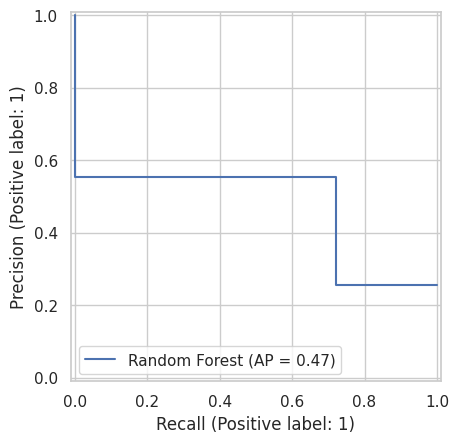

In [495]:
PrecisionRecallDisplay.from_predictions(y_val,random_forest_previsto,name='Random Forest')


###**📈 Evaluación del Modelo: Random Forest**

- Curva PR:
- Comienza en una precisión de 1.0 cuando el recall es 0.0
- Baja a 0.67 en recall 0.33
- Desciende luego a 0.33 y se mantiene estable hasta el recall completo (1.0)
- Promedio de Precisión (Average Precision): 0.47


- Este valor resume el área bajo la curva PR y da una idea de cuán bien se comporta el modelo en promedio, especialmente en un contexto de clases desbalanceadas.


<div align='justify'>
- Este valor resume el área bajo la curva PR y da una idea de cuán bien se comporta el modelo en promedio, especialmente en un contexto de clases desbalanceadas.

🔍 Interpretación- Esta forma escalonada es característica de modelos que hacen predicciones discretas más que probabilísticas suaves.
- Precisión inicial alta indica que los primeros casos detectados por el modelo tienen pocos falsos positivos.
- Caída pronunciada refleja que al intentar capturar más canceladores (mayor recall), el modelo pierde precisión.
Esto cuadra con lo visto en la tabla de métricas: el Random Forest es más conservador, detecta canceladores con menor recall, pero lo que detecta lo hace con mayor precisión.
</div>

**Evaluación narrativa curva de precisión por sensibilidad en Random Forest**

<div align='justify'>
La curva de precisión vs sensibilidad del modelo Random Forest sin balanceo muestra un Average Precision (AP) de 0.47, lo que indica un rendimiento moderado en la detección de cancelaciones. A medida que se incrementa el recall, la precisión disminuye, reflejando el compromiso inherente entre ambas métricas. Esta curva es especialmente relevante en contextos desbalanceados, ya que permite evaluar el comportamiento del modelo más allá de la exactitud global. Los resultados sugieren que, si se prioriza la detección de churn, será necesario aceptar una mayor proporción de falsos positivos o ajustar el umbral de decisión para optimizar el balance según los objetivos del negocio.
</div>

##**12.4 Gráfico curva de precisión y sencibilidad**

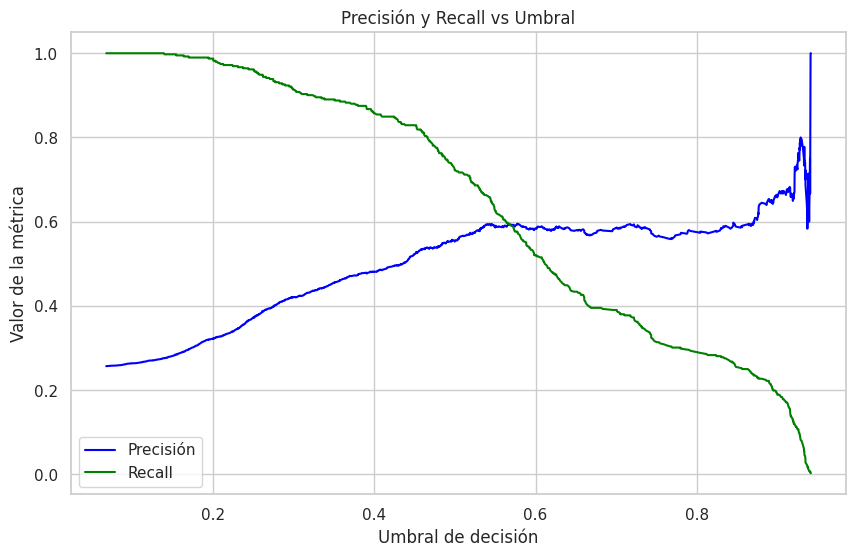

In [496]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Paso 1: obtener las probabilidades de clase positiva
y_scores = random_forest.predict_proba(X_val)[:, 1]

# Paso 2: calcular precisión, recall y umbrales
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Paso 3: graficar precisión y recall vs umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precisión', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Umbral de decisión')
plt.ylabel('Valor de la métrica')
plt.title('Precisión y Recall vs Umbral')
plt.legend()
plt.grid(True)
plt.show()

##**12.5 Gráfico de calor destacando las variables más propensas a cancelar**

In [497]:
# Obtener importancias del modelo
importances = random_forest.feature_importances_

# Obtener nombres de columnas codificadas
columnas_codificadas = one_hot.get_feature_names_out(columnas)

# Crear DataFrame ordenado por importancia
df_importancia = pd.DataFrame({
    'Feature': columnas_codificadas,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
df_importancia


,Feature,Importance
14,remainder__Meses de contrato,0.263762
25,remainder__Monto total según meses contratados,0.198967
4,onehotencoder__Tipo de contrato_Month-to-month,0.106611
20,remainder__Soporte técnico (INTERNET),0.082974
17,remainder__Seguridad en línea (INTERNET),0.045030
26,remainder__Monto diario,0.040667
6,onehotencoder__Tipo de contrato_Two year,0.040416
24,remainder__Monto mensual,0.040261
5,onehotencoder__Tipo de contrato_One year,0.034394
9,onehotencoder__Forma de pago_Electronic check,0.025880


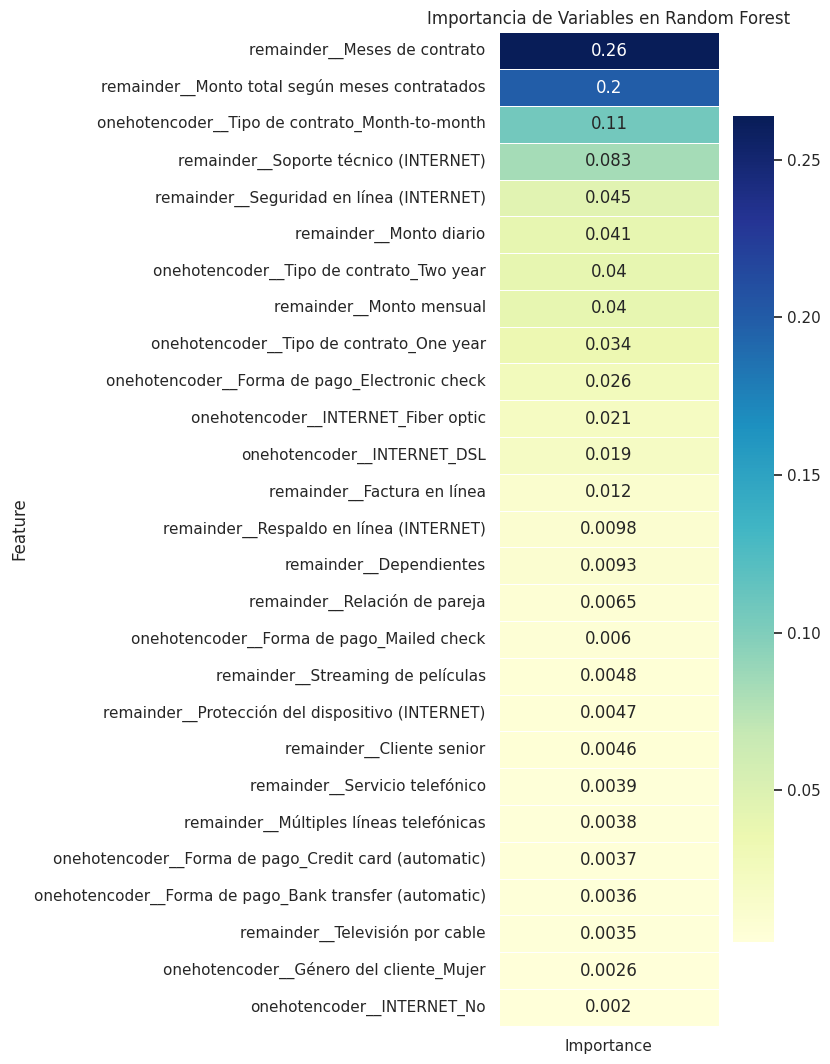

In [498]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el gráfico de calor
plt.figure(figsize=(8, len(df_importancia) * 0.4))  # Ajusta altura según número de variables
sns.heatmap(
    df_importancia.set_index('Feature'),
    annot=True,
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5
)

plt.title('Importancia de Variables en Random Forest')
plt.tight_layout()
plt.show()

###**📌Top Features que dominan el modelo**

Aquí están los factores que más pesan en la decisión del RandomForest:
### 📊 Factores más influyentes en la decisión del modelo Random Forest

| **Feature** | **Importancia** | **Categoría** |
|-------------|------------------|----------------|
| Meses de contrato | 0.2638 | Contrato |
| Monto total según meses contratados | 0.1990 | Financiero |
| Tipo de contrato: Month-to-month | 0.1066 | Contrato |
| Soporte técnico (INTERNET) | 0.0830 | Servicio |
| Seguridad en línea (INTERNET) | 0.0450 | Servicio |
| Monto diario | 0.0407 | Financiero |
| Tipo de contrato: Two year | 0.0404 | Contrato |
| Monto mensual | 0.0403 | Financiero |
| Tipo de contrato: One year | 0.0344 | Contrato |
| Forma de pago: Electronic check | 0.0259 | Pago |
| INTERNET: Fiber optic | 0.0210 | Servicio |
| INTERNET: DSL | 0.0195 | Servicio |
| Factura en línea | 0.0118 | Servicio |
| Respaldo en línea (INTERNET) | 0.0098 | Servicio |
| Dependientes | 0.0093 | Demografía |
| Relación de pareja | 0.0065 | Demografía |
| Forma de pago: Mailed check | 0.0060 | Pago |
| Streaming de películas | 0.0048 | Servicio |
| Protección del dispositivo (INTERNET) | 0.0047 | Servicio |
| Cliente senior | 0.0046 | Demografía |
| Servicio telefónico | 0.0039 | Servicio |
| Múltiples líneas telefónicas | 0.0038 | Servicio |
| Forma de pago: Credit card (auto...) | 0.0037 | Pago |
| Forma de pago: Bank transfer (auto...) | 0.0036 | Pago |
| Televisión por cable | 0.0035 | Servicio |
| Género del cliente: Mujer | 0.0026 | Demografía |
| INTERNET: No | 0.0020 | Servicio |

---

### 🔍 Insight clave
<div align='justify'>
> **El modelo Random Forest prioriza fuertemente variables contractuales y financieras, especialmente la duración del contrato y el monto total comprometido, lo que sugiere que el riesgo de churn está estrechamente vinculado a la estabilidad del vínculo comercial.** En contraste, variables demográficas y de entretenimiento tienen un peso marginal, lo que refuerza la idea de que la permanencia del cliente depende más de su compromiso económico que de sus preferencias de servicio.
</div>



<div align='justify'>

- Dominancia del contrato: Las variables relacionadas con el tipo y duración del contrato explican más del 40% de la decisión del modelo.
- Peso financiero: El monto total y mensual también tienen alta influencia, lo que sugiere sensibilidad del modelo al compromiso económico.
- Servicios específicos como soporte técnico y seguridad en línea tienen más peso que entretenimiento o telefonía.
- Variables demográficas como género o edad tienen muy baja importancia relativa

</div>


##**12.5 Gráfico de barra:"Top 10 Variables más Importantes para Churn"**

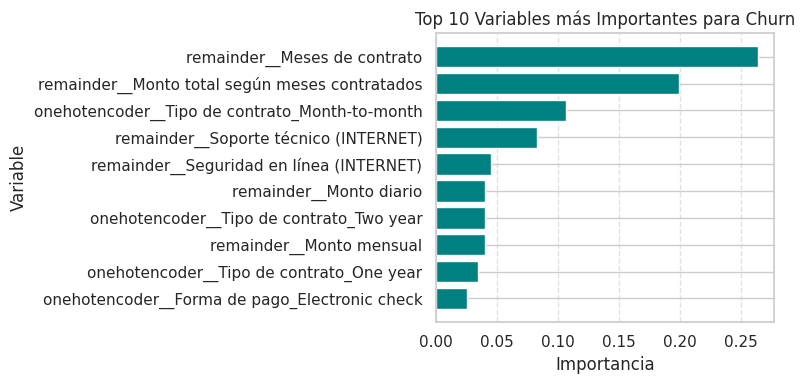

In [499]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que ya tenés las siguientes variables:
# importances = random_forest.feature_importances_
# columnas = one_hot.get_feature_names_out(columnas)

# Crear DataFrame y seleccionar Top 10
df_importancia = pd.DataFrame({'Feature': columnas_codificadas, 'Importance': importances})
df_top = df_importancia.sort_values(by='Importance', ascending=True).tail(10)

# Gráfico de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(df_top['Feature'], df_top['Importance'], color='teal')
plt.title('Top 10 Variables más Importantes para Churn')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

____________________________________________________________________________________________________________________________________________________________________________________________________________

#**13. XGBOOST**

In [500]:
pip install xgboost

In [501]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [503]:
model = xgb.XGBClassifier(
    n_estimators=100,       # número de árboles
    max_depth=5,            # profundidad máxima
    learning_rate=0.1,      # tasa de aprendizaje
    use_label_encoder=False, # evita warnings
    eval_metric='logloss'   # métrica para entrenamiento
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [504]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
from scipy.stats import t

# Modelo
modelo = xgb.XGBClassifier(max_depth=5, random_state=5)

# Validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

# Cálculo del IC 95%
recalls = cv_resultados['test_score']
media = np.mean(recalls)
std = np.std(recalls, ddof=1)
n = len(recalls)
t_critico = t.ppf(0.975, df=n-1)
margen_error = t_critico * std / np.sqrt(n)
intervalo = (media - margen_error, media + margen_error)

print(f"Recall promedio: {media:.3f}")
print(f"IC 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")

Recall promedio: 0.505
IC 95%: (0.468, 0.543)


##**13.1 Matriz de confusión XGBOOST**

In [505]:
y_pred = model.predict(X_test)
matriz_confusion=confusion_matrix(y_test, y_pred)
matriz_confusion

array([[1034,  104],
       [ 188,  200]])

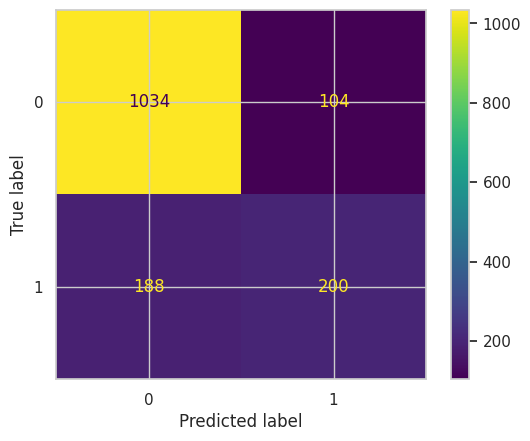

In [506]:
Visualizacion=ConfusionMatrixDisplay(matriz_confusion)
Visualizacion.plot()

In [507]:
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score: 0.5780346820809249
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1138
           1       0.66      0.52      0.58       388

    accuracy                           0.81      1526
   macro avg       0.75      0.71      0.73      1526
weighted avg       0.80      0.81      0.80      1526



In [508]:
print(f'La precisión del modelo es : {precision_score(y_test,y_pred):,.4f}')
print(f'El Recall del modelo es    : {recall_score(y_test,y_pred):,.4f}')
print(f'La exactitud del modelo es : {accuracy_score(y_test,y_pred):,.4f}')
print(f'El F1 del modelo es        : {f1_score(y_test,y_pred):,.4f}')

La precisión del modelo es : 0.6579
El Recall del modelo es    : 0.5155
La exactitud del modelo es : 0.8087
El F1 del modelo es        : 0.5780


**Evaluación narrativa de la matriz de confusión XGBOOST**

<div align='justify'>
El modelo XGBoost entrenado sobre datos originales (sin balanceo) muestra una alta precisión global (80.87 %), lo que indica buen desempeño en la clasificación general. Sin embargo, al analizar la clase minoritaria (Churn), se observa una precisión de 65.8 % y un recall de 51.6 %, lo que sugiere que el modelo tiende a subestimar los casos de churn.
La matriz de confusión revela que el modelo clasifica correctamente la mayoría de los clientes que no abandonan (1034 casos), pero falla en identificar 188 clientes que sí lo hacen. Esto se refleja en un F1 Score de 0.578, que combina precisión y recall para la clase positiva.
Estos resultados justifican la exploración de técnicas de balanceo como SMOTE o NearMiss, que podrían mejorar la sensibilidad del modelo ante la clase minoritaria sin sacrificar estabilidad
</div>





---



---



#14. **ANÁLISIS DE DATOS**   



In [509]:
import pandas as pd

# Definir recall scores y el total de churn
recall_scores = {
    'KFold sin estratificar': 0.47,
    'Árbol sin balanceo -con estratificar	': 0.44,

}
support = 1869

# Calcular falsos negativos para cada modelo
false_negatives = {model: float((1 - recall) * support) for model, recall in recall_scores.items()}

# Convertir en DatFrame
fn_df = pd.DataFrame(list(false_negatives.items()), columns=['Model', 'False Negatives'])

# Imprimir resultados
print('Sin balanceo')
print(fn_df)

Sin balanceo
                                    Model  False Negatives
0                  KFold sin estratificar           990.57
1  Árbol sin balanceo -con estratificar\t          1046.64


In [510]:
import pandas as pd

# Definir recall scores y el total de churn
recall_scores = {
    'SMOTE externo ': 0.81,
    'Árbol + SMOTE': 0.60,
    'NearMiss V3': 0.67,
    'Random Forest': 0.44,
    'XGBoost': 0.50
}
support = 3778

# Calcular falsos negativos para cada modelo
false_negatives = {model: float((1 - recall) * support) for model, recall in recall_scores.items()}

# Convertir en DatFrame
fn_df = pd.DataFrame(list(false_negatives.items()), columns=['Model', 'False Negatives'])

# Imprimir resultados
print('Con balanceo')
print(fn_df)

Con balanceo
            Model  False Negatives
0  SMOTE externo            717.82
1   Árbol + SMOTE          1511.20
2     NearMiss V3          1246.74
3   Random Forest          2115.68
4         XGBoost          1889.00


##**14.1 Resumen del análisis de datos**

###**14.1.1 Tabla de comentarios**

| Estrategia                           |  Churn  |    Recall promedio    |Intervalo Recall (IC 95%) | Falsos negativos  | Comentario clave                             |
|:------------------------------------:|:-------:|:---------------------:|:------------------------:|:-----------------:|:--------------------------------------------:|
|SMOTE externo                         |  3778   |          0.81         |        0.80-0.81         |       718         |Alto recall, estrecho IC, mejor cobertura     |
|                                      |         |                       |                          |                   |                                              |
|árbol + SMOTE                         |  3778   |          0.60         |        0.51-0.70         |      1511         |Mejora con SMOTE, pero menos robusto          |
|                                      |         |                       |                          |                   |                                              |
|NearMiss v3(undersampling)            |  3778   |          0.67         |        0.64-0.71         |      1247         |Buen recall, pero más falsos negativos        |
|                                      |         |                       |                          |                   |                                              |
|XGBoost                               |  3778   |          0.50         |        0.47-0.54         |      1889         |Estable pero bajo recall                      |
|                                      |         |                       |                          |                   |                                              |
|Random Forest                         |  3778   |          0.44         |        0.42-0.46         |      2116         |Preciso pero poco sensible                    |
|                                      |         |                       |                          |                   |                                              |
|Árbol sin balanceo -con estratificar  |  1869   |          0.44         |        0.33-0.55         |      1047         |Inestable y menos eficaz                      |  
|                                      |         |                       |                          |                   |                                              |
|KFold sin estratificar (sin balanceo) |   1869  |          0.47         |        0.39-0.56         |       991         |Métrica engañosa por falta de estratificación |


###**14.1.2 Métricas estadísticas**

In [511]:
import statistics
from scipy.stats import mode
import numpy as np


recall_score=[0.80555556, 0.80529801, 0.80529801, 0.8015873 , 0.81481481]
media = statistics.mean(recall_score)
mediana_Q2=statistics.median(recall_score)
desv_std=statistics.stdev(recall_score)
moda = mode(recall_score, keepdims=True)[0][0]
Q1 = np.percentile(recall_score, 25)
Q3 = np.percentile(recall_score, 75)
DataFrame=pd.DataFrame({'Métrica':['media','desv_std','moda','mediana_Q2','Q1','Q3'],'Valores':[media,desv_std,moda,mediana_Q2,Q1,Q3]})
DataFrame


,Métrica,Valores
0,media,0.806511
1,desv_std,0.004926
2,moda,0.805298
3,mediana_Q2,0.805298
4,Q1,0.805298
5,Q3,0.805556


###**14.1.3 Gráfico de barra horizontal**

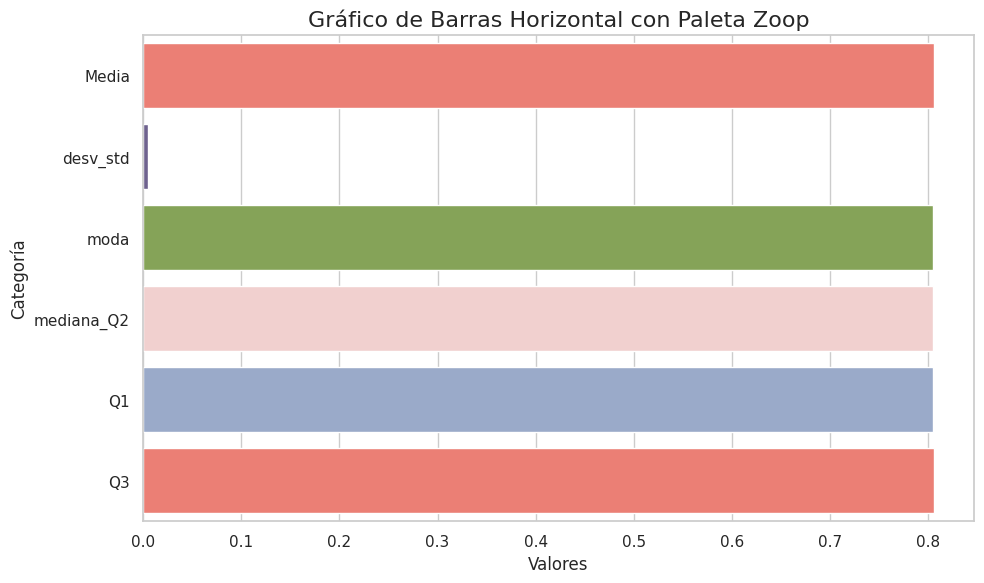

In [512]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = pd.DataFrame({
    'Categoría': ['Media', 'desv_std', 'moda', 'mediana_Q2', 'Q1','Q3'],
    'Valores': [0.806511, 0.004926, 0.805298, 0.805298, 0.805298,0.805556]
})


# Estilo y paleta Zoop
sns.set_style("whitegrid")
zoop_palette = sns.color_palette(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"])

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Valores', y='Categoría', data=data, palette=zoop_palette)

# Títulos y etiquetas
plt.title('Gráfico de Barras Horizontal con Paleta Zoop', fontsize=16)
plt.xlabel('Valores')
plt.ylabel('Categoría')

plt.tight_layout()
plt.show()

##**15. CONCLUSIÓN**

<div align='justify'>

#Entre las estrategias evaluadas, el modelo entrenado con SMOTE externo se posiciona como el más eficaz en la detección de clientes en riesgo de churn. Con un recall promedio de 0.81 y un intervalo de confianza estrecho (0.80–0.81), logra identificar la mayor proporción de casos positivos, reduciendo los falsos negativos a 718. Esta consistencia sugiere una generalización robusta, se complementó el análisis con métricas de precisión para evaluar el costo de posibles falsos positivos, lo cual indica que el modelo tiene alta estabilidad (desviación baja), la moda, mediana y Q2 coinciden (distribución muy concentrada), el rango entre Q3-Q2 = 0.0068 es estrecho, por lo tanto hay consistencia entre folds.

#El modelo de árbol con SMOTE revela que la variable más influyente en la predicción de cancelación es el tipo de contrato, específicamente el contrato “Month-to-month”, con una importancia de 0.5876, muy por encima del resto. Esto indica que los clientes con contratos mensuales son notablemente más propensos a cancelar, probablemente debido a la flexibilidad que les permite salir sin penalizaciones.
#La segunda variable más relevante es la forma de pago mediante cheque electrónico (), con una importancia de 0.1984. Este método podría estar asociado a perfiles menos bancarizados o menos comprometidos con automatizaciones, lo que también puede reflejar menor fidelización.
#En tercer lugar, el uso de internet por fibra óptica aparece con una importancia de 0.0477. Aunque es un servicio de alta velocidad, podría estar vinculado a expectativas más exigentes o a mayor competencia en el mercado, lo que facilita la migración.


#Otras variables con menor pero no despreciable influencia incluyen:
#- Meses de contrato (0.0421): clientes con menos tiempo acumulado tienden a cancelar más.
#- Factura en línea (0.0412): puede indicar un perfil digital, más autónomo y propenso a cambios rápidos.

#🎯 **Recomendaciones estratégicas**

#Para mitigar el churn en los segmentos más vulnerables, se propone:

#- Migración incentivada: ofrecer beneficios exclusivos para que clientes con contrato mensual pasen a contratos anuales o bianuales.
#- Automatización del pago: fomentar el uso de métodos automáticos (tarjeta o transferencia bancaria) mediante descuentos o recompensas.
#- Monitoreo proactivo: implementar alertas para clientes con pocos meses de contrato y pago electrónico, permitiendo intervenciones tempranas.
#- Optimización de experiencia digital: revisar la experiencia de usuarios con fibra óptica y factura en línea, asegurando que el servicio cumpla con sus expectativas.



</div>